# House Price Prediciton

In [120]:
pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.0 MB/s eta 0:00:00


In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from deap import base, creator, tools, algorithms
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Preprocessing

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning/train.csv')

In [4]:
dataset.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
dataset.tail(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [6]:
dataset.shape

(1460, 81)

In [7]:
dataset.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [8]:
dataset.describe(include='object')

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

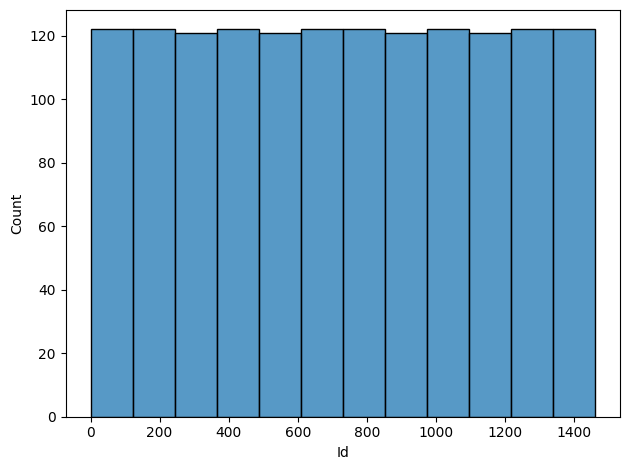

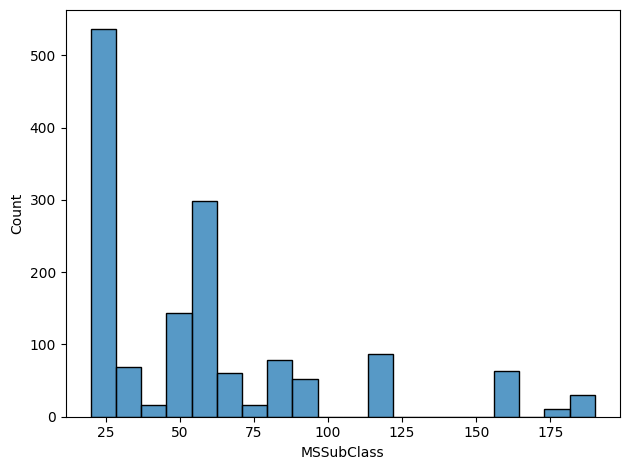

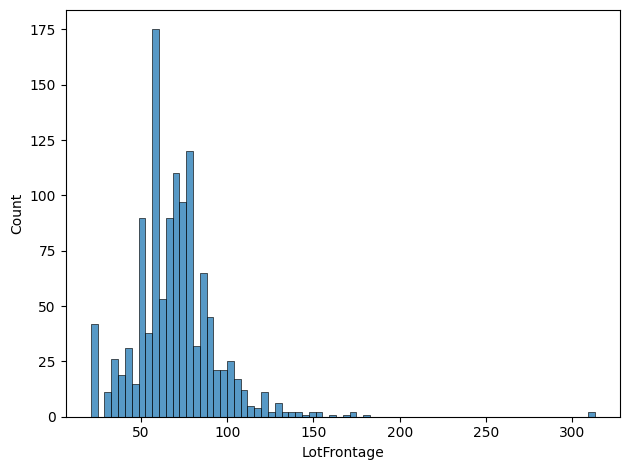

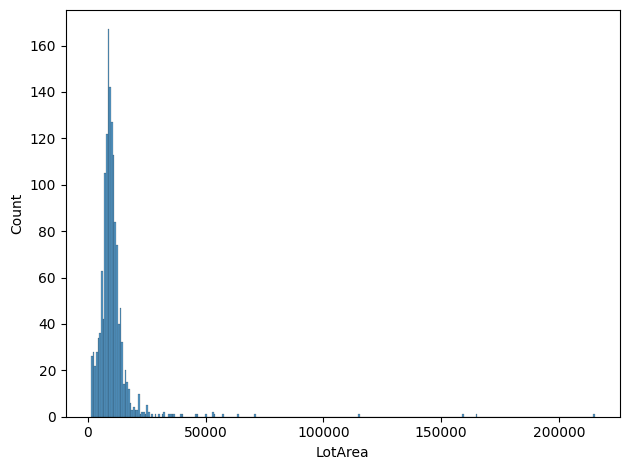

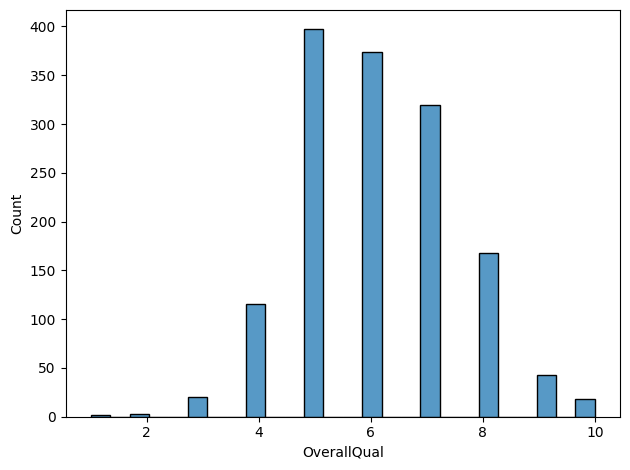

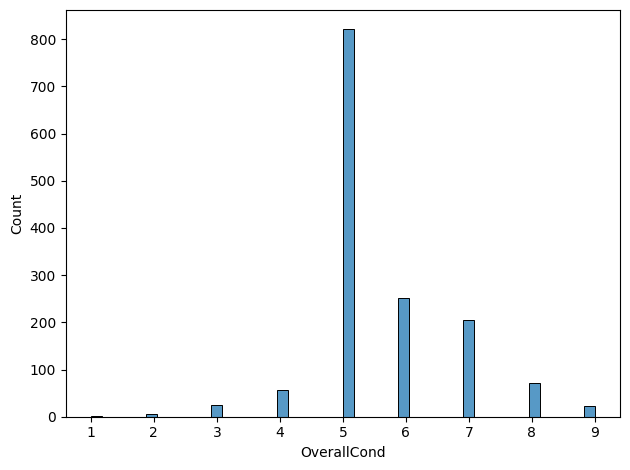

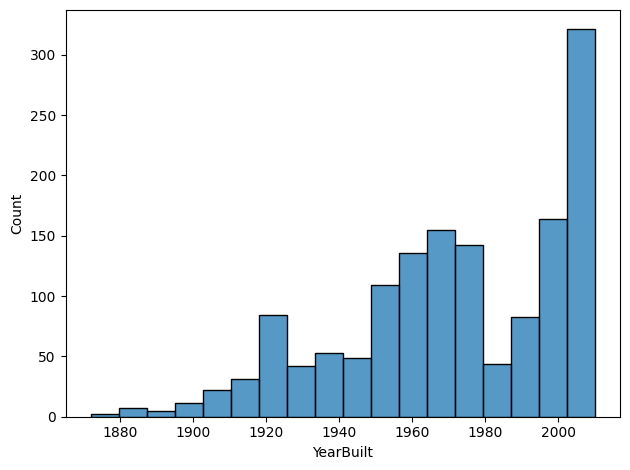

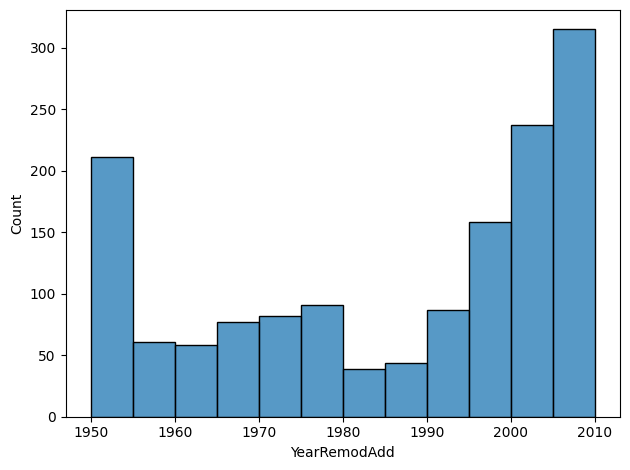

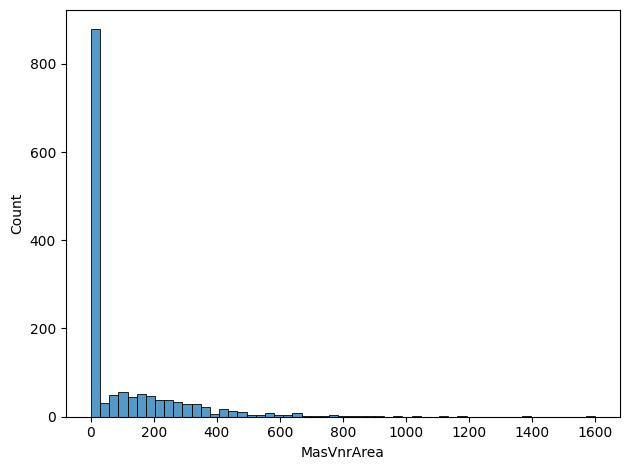

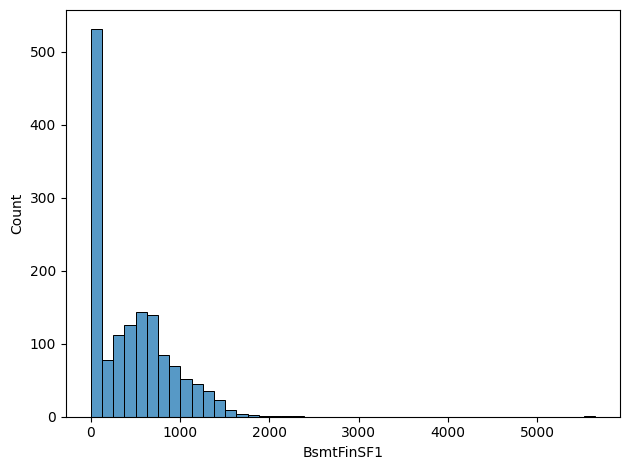

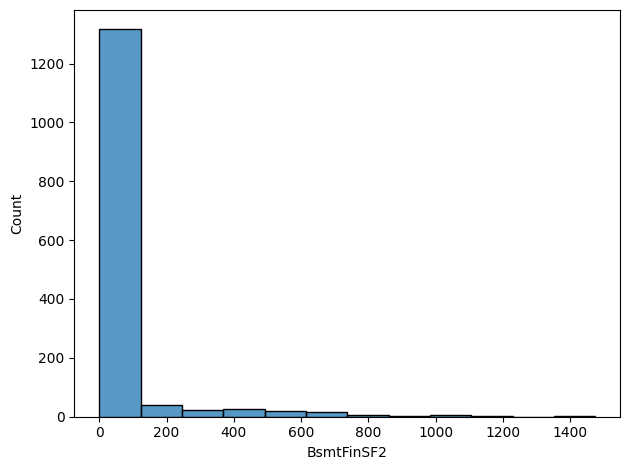

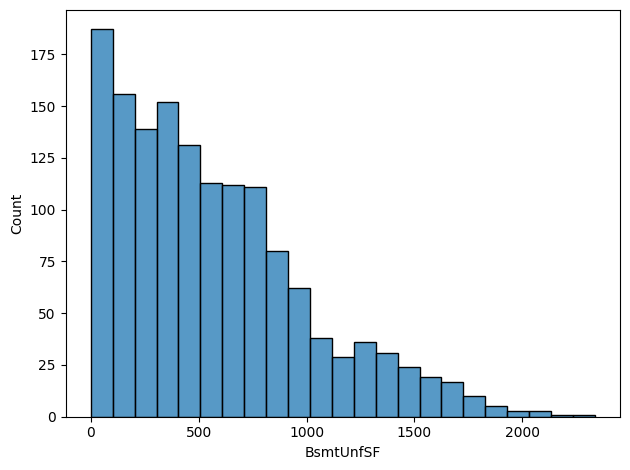

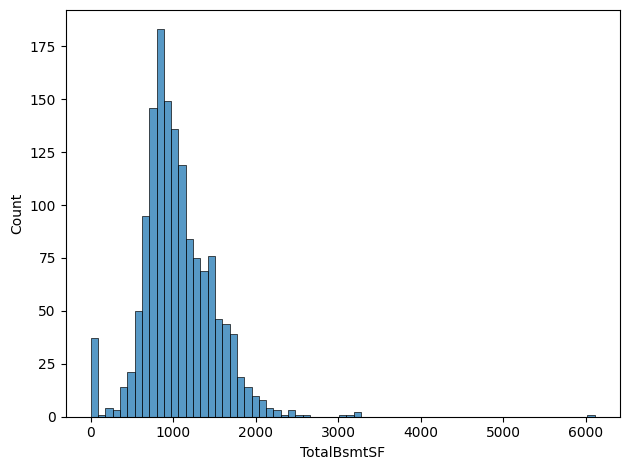

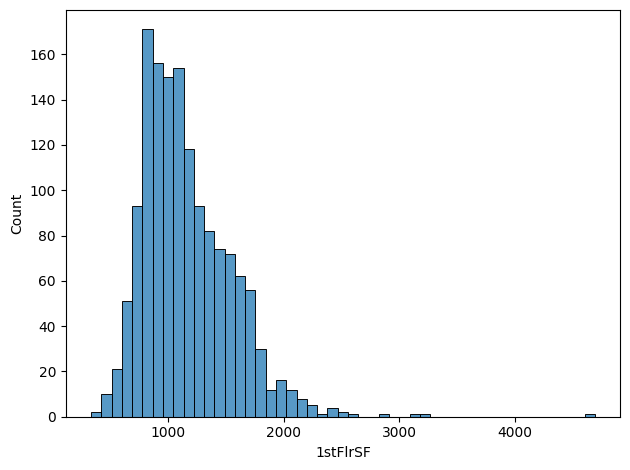

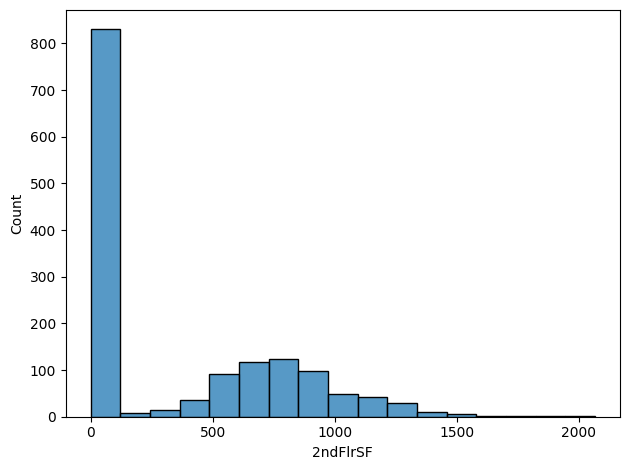

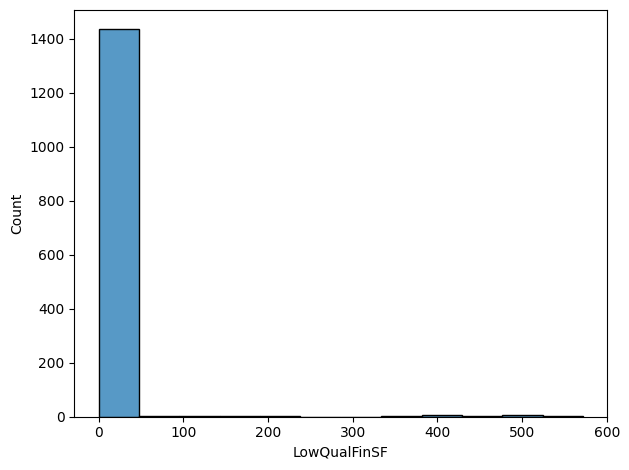

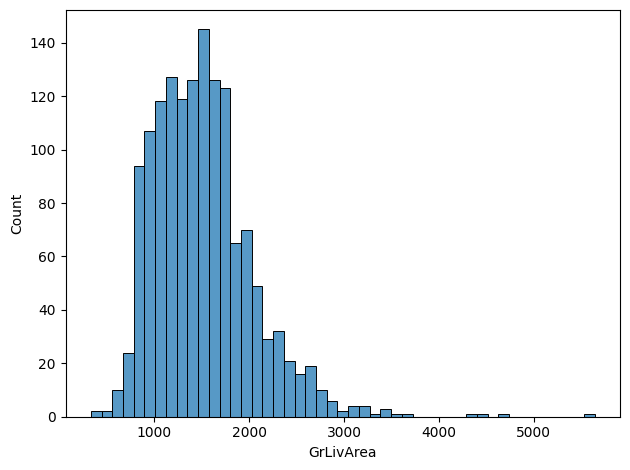

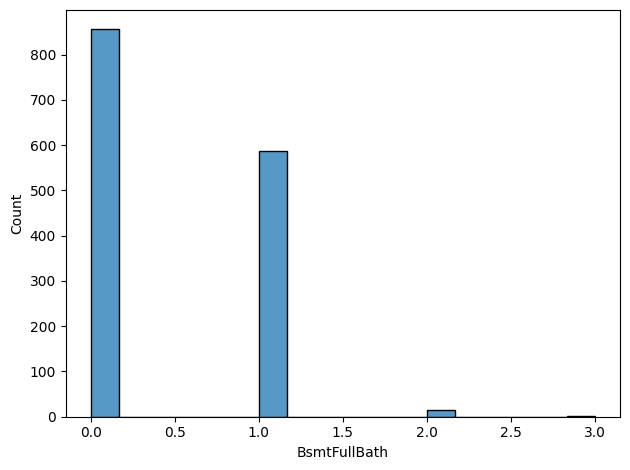

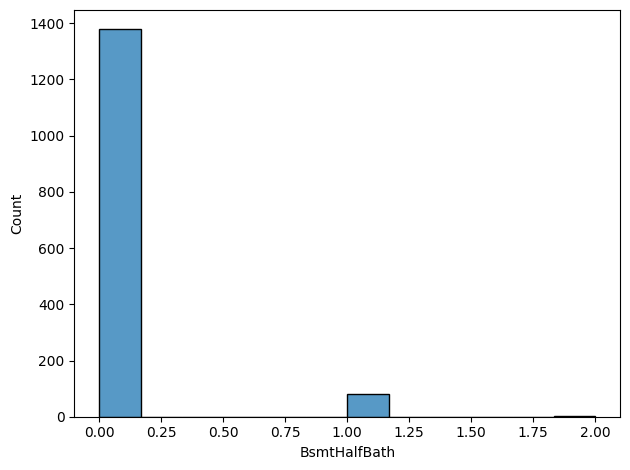

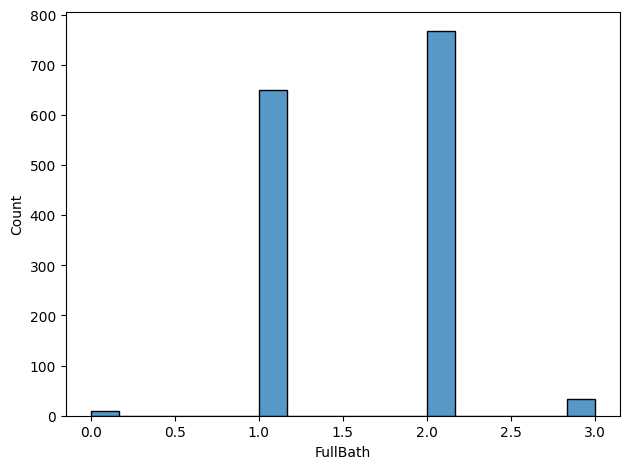

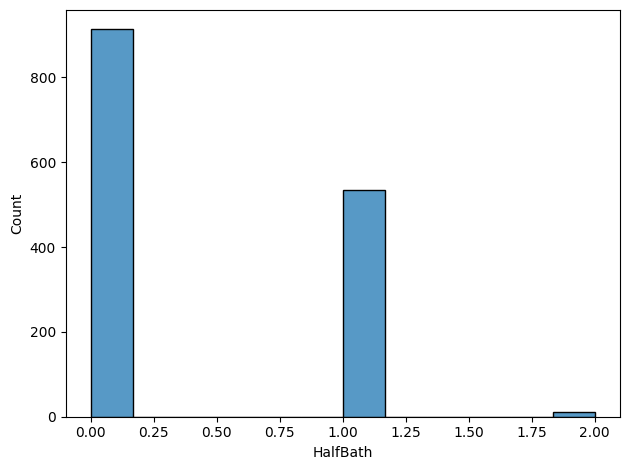

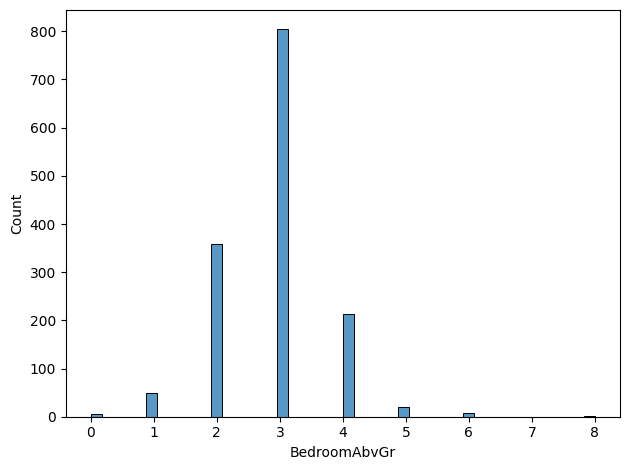

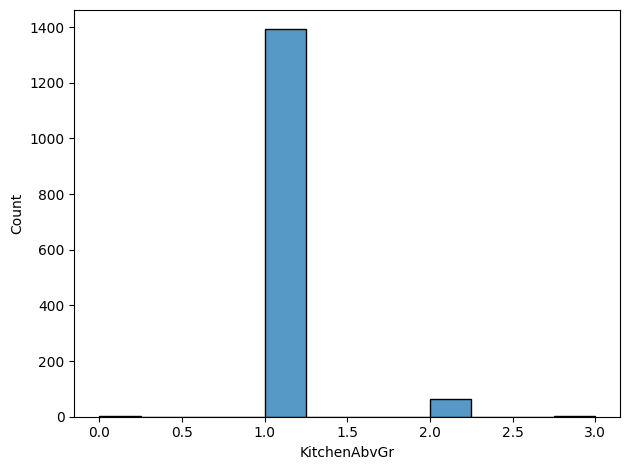

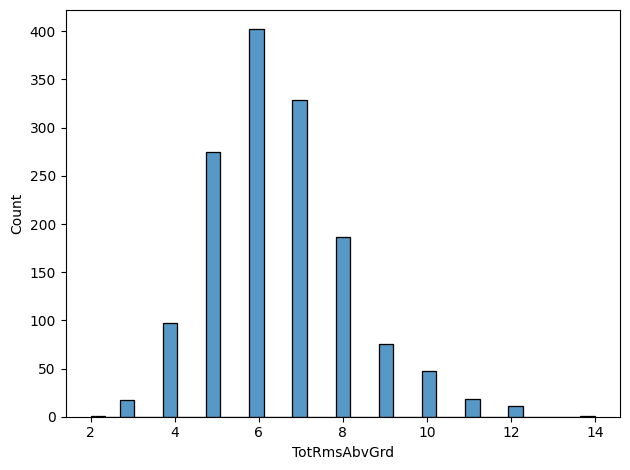

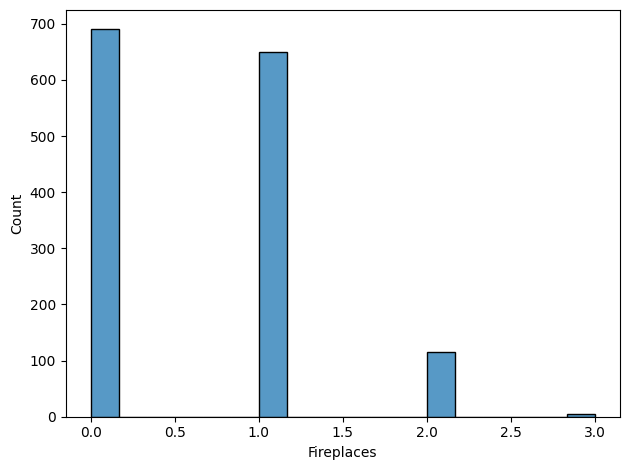

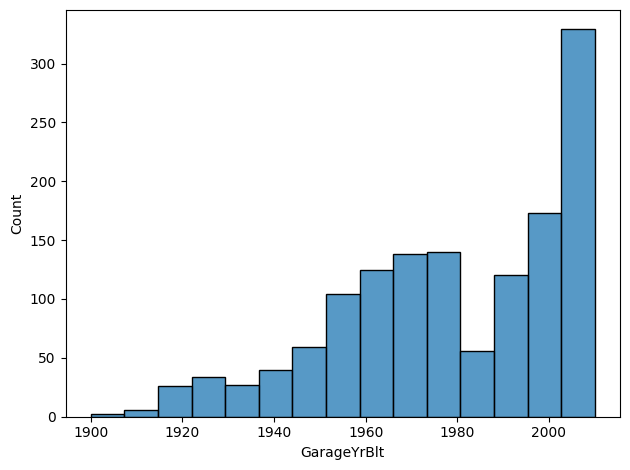

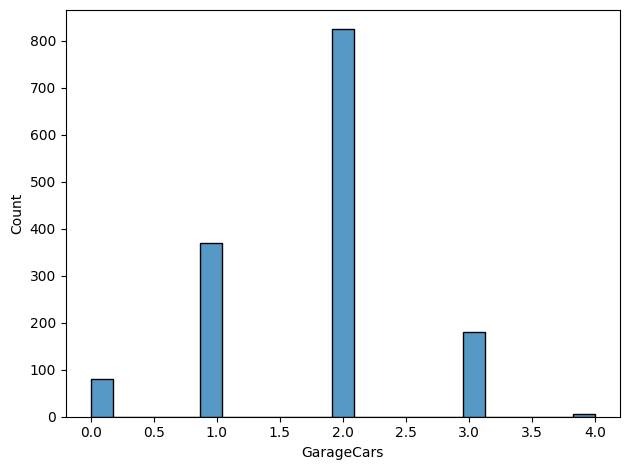

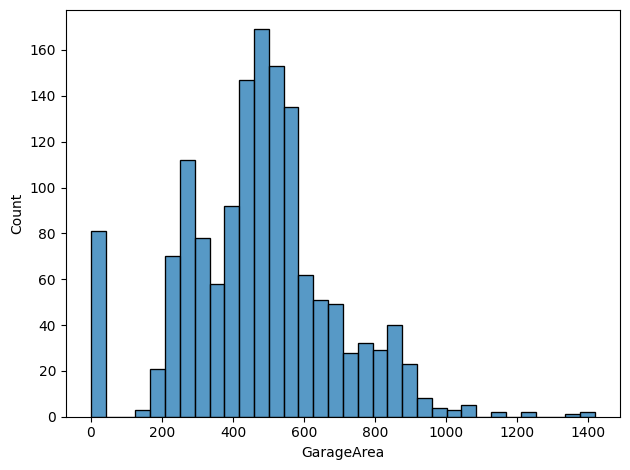

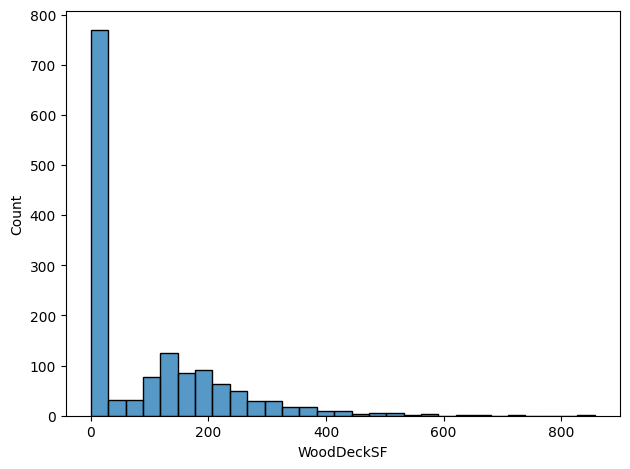

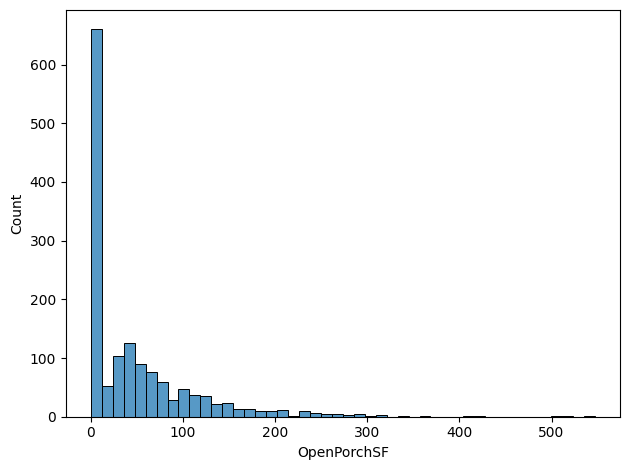

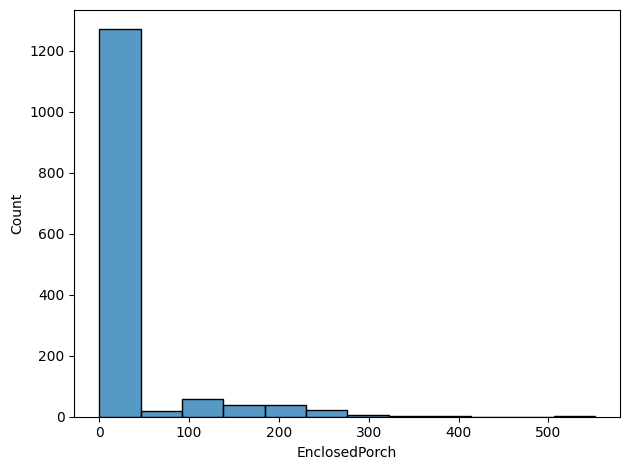

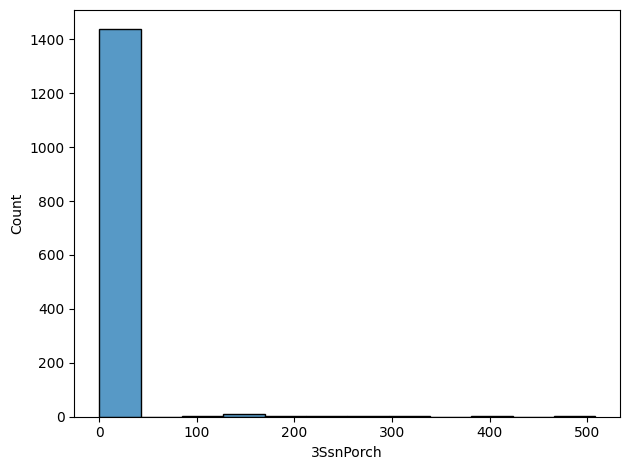

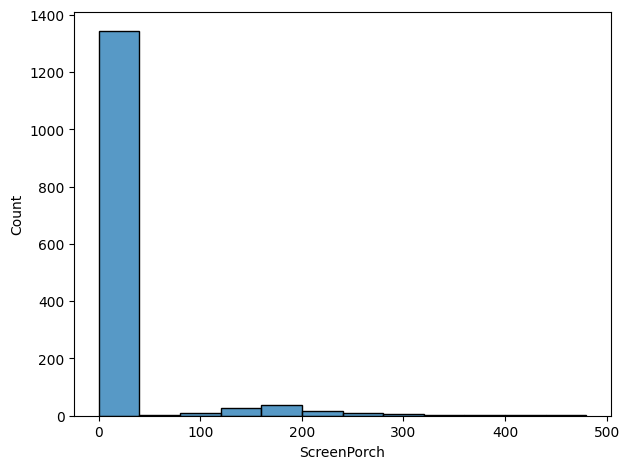

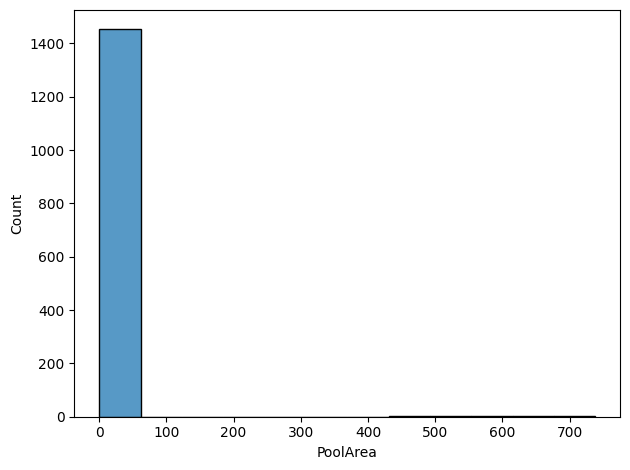

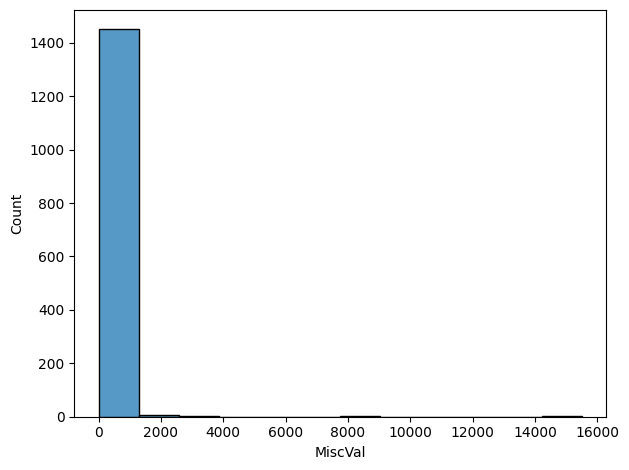

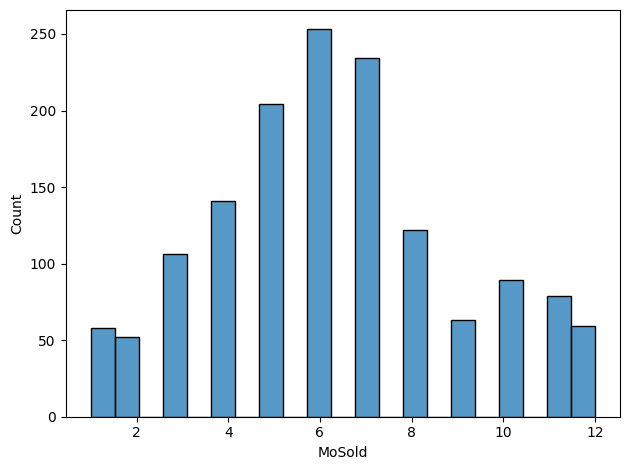

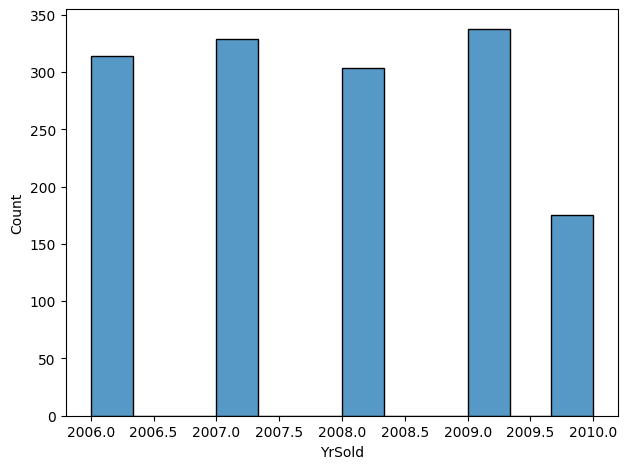

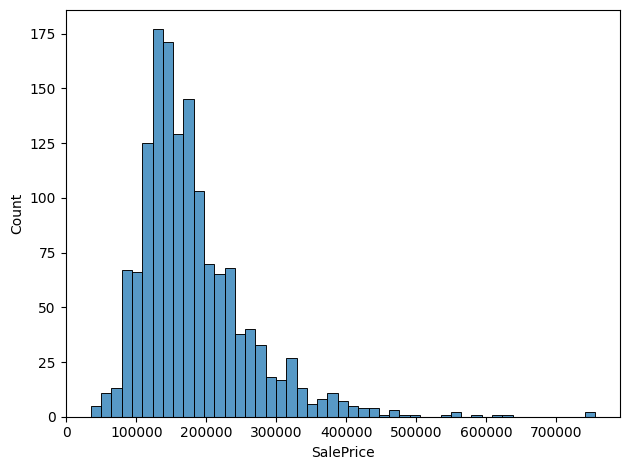

In [9]:
for i in dataset.select_dtypes(include= "number").columns:
  sns.histplot(data=dataset,x=i)
  plt.tight_layout()
  plt.show()

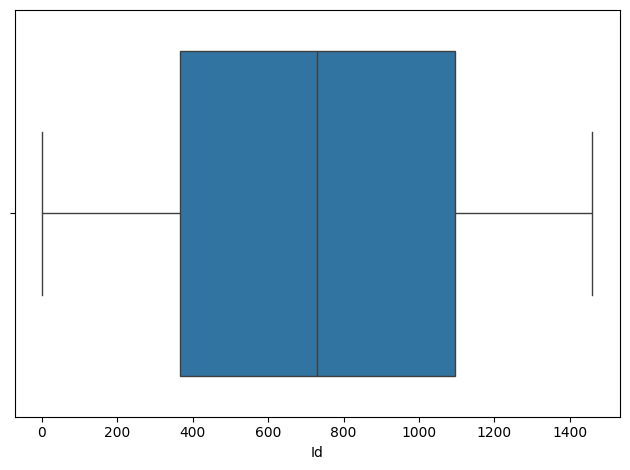

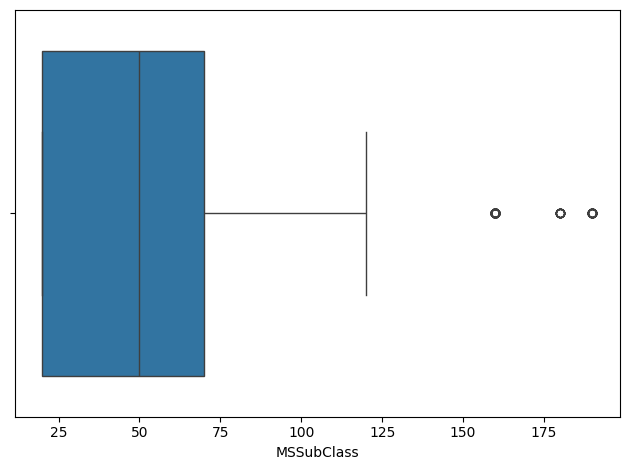

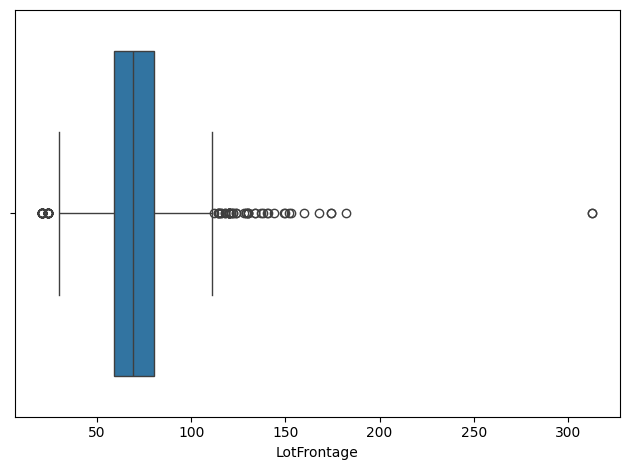

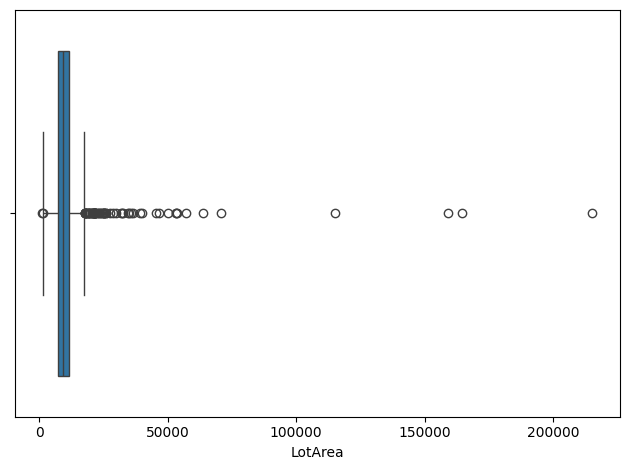

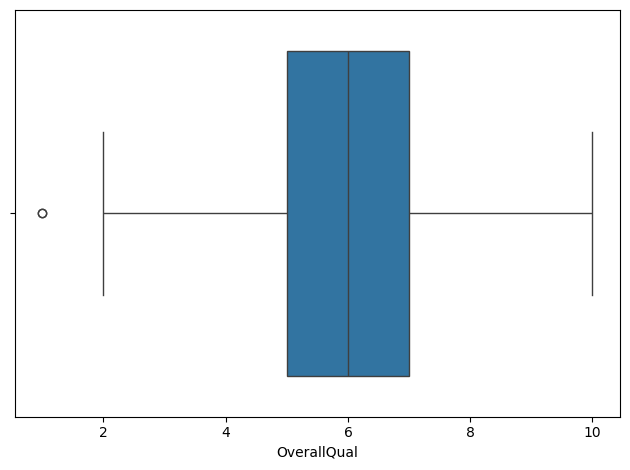

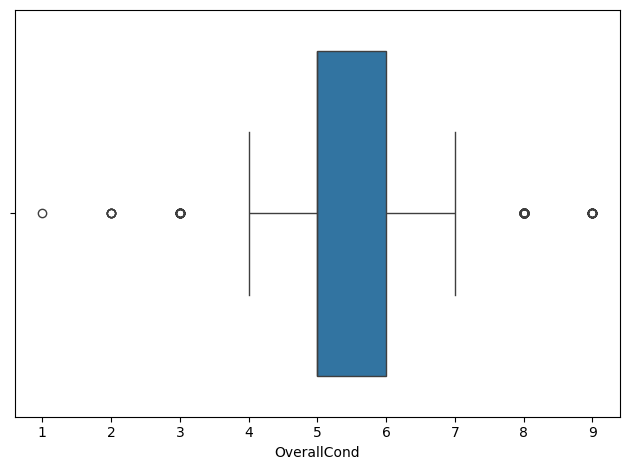

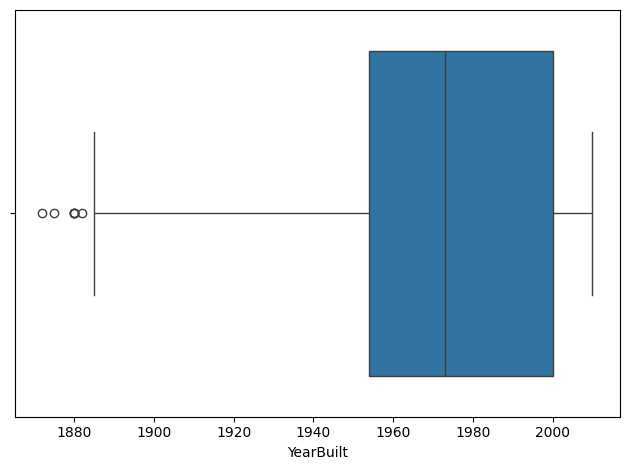

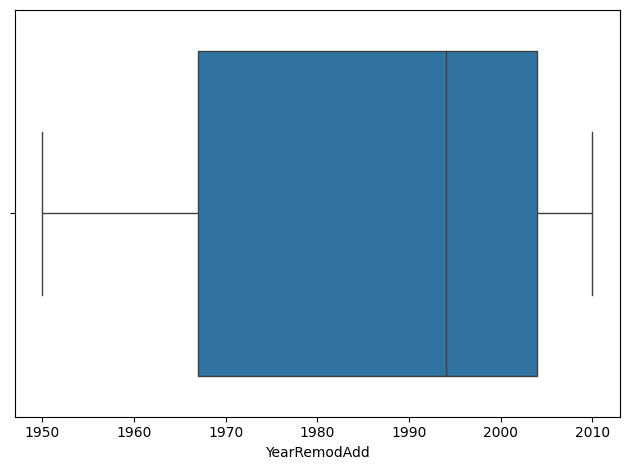

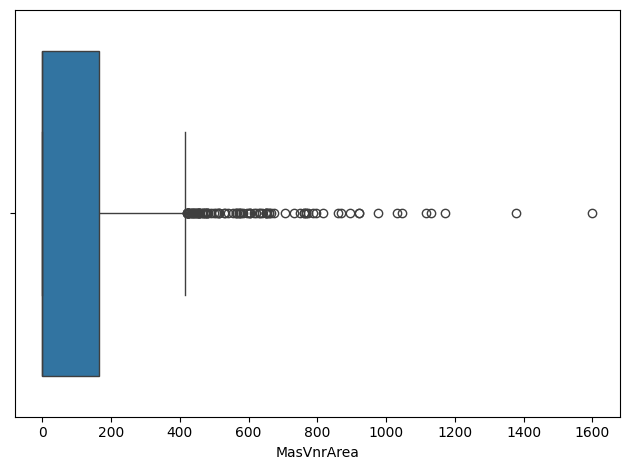

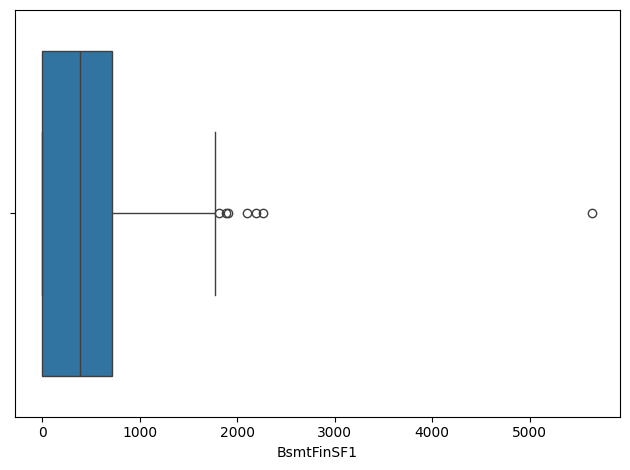

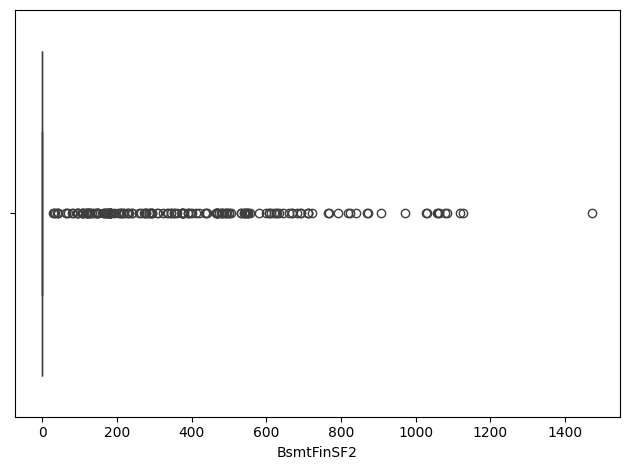

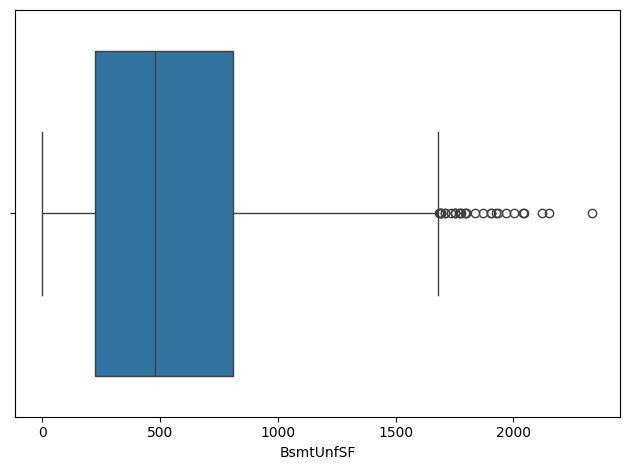

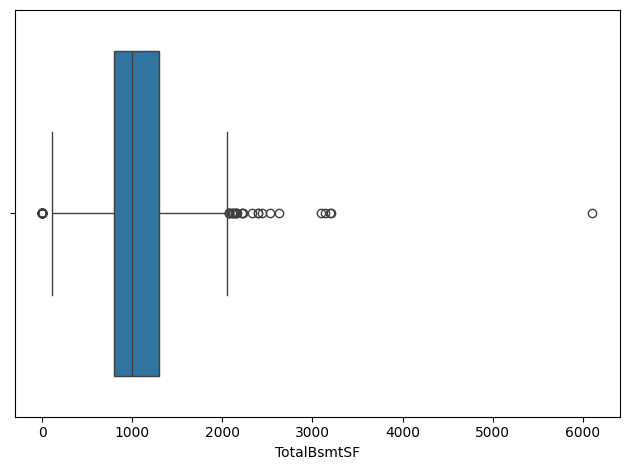

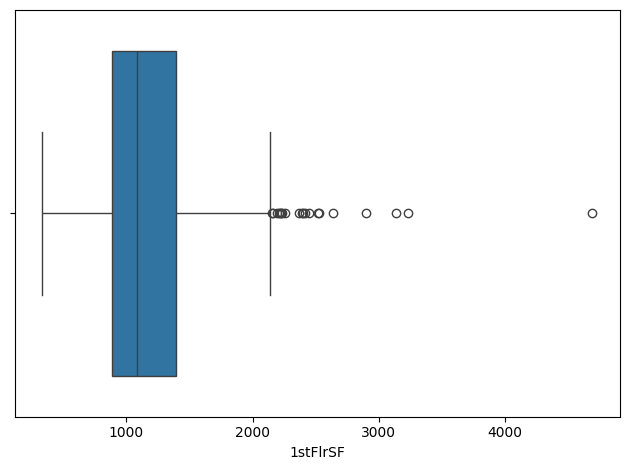

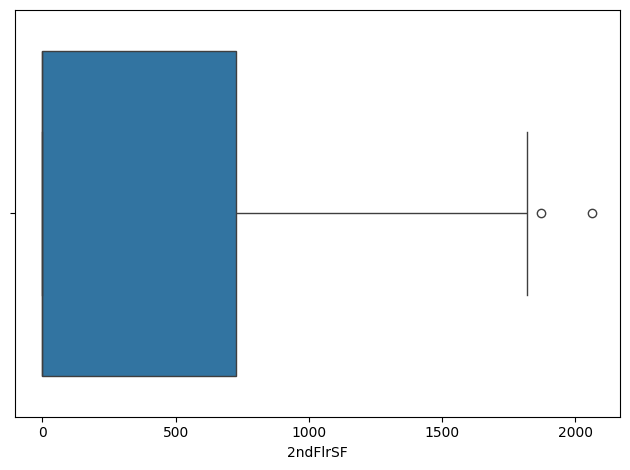

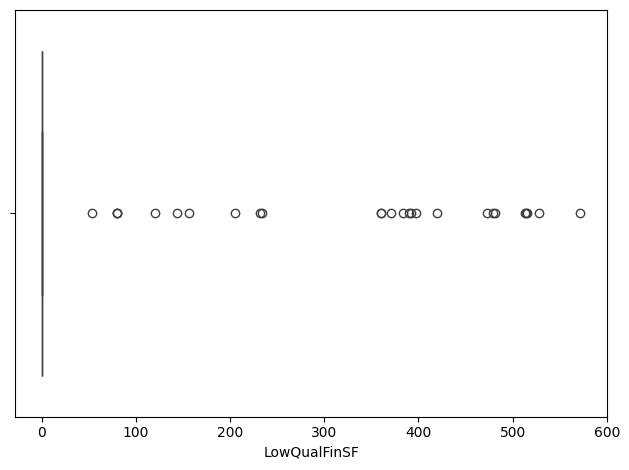

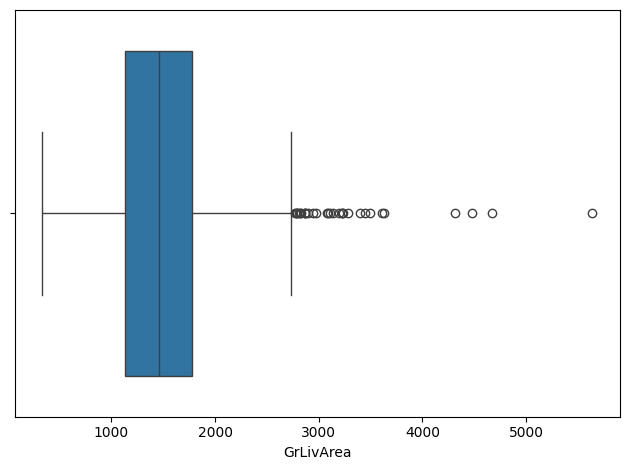

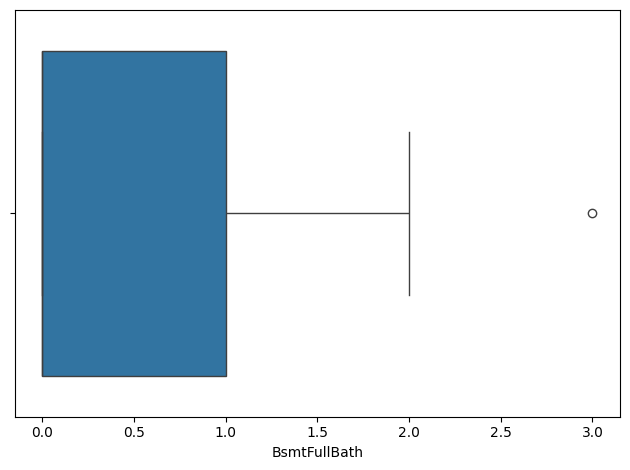

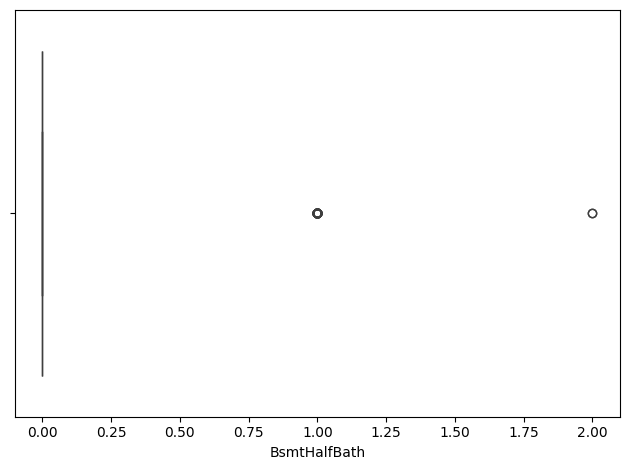

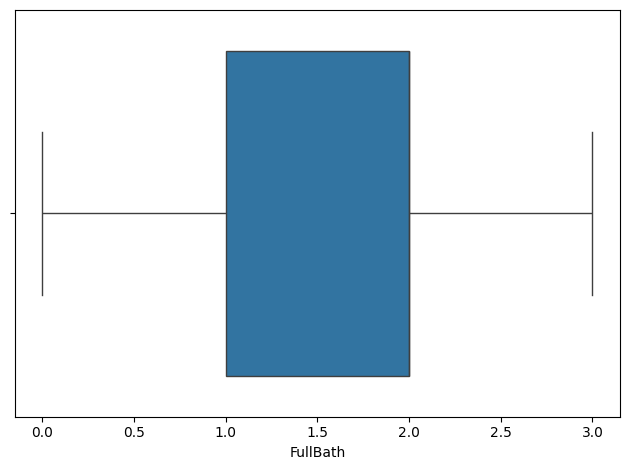

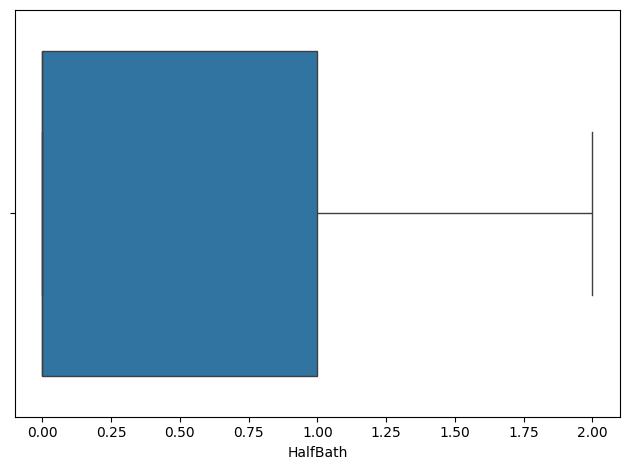

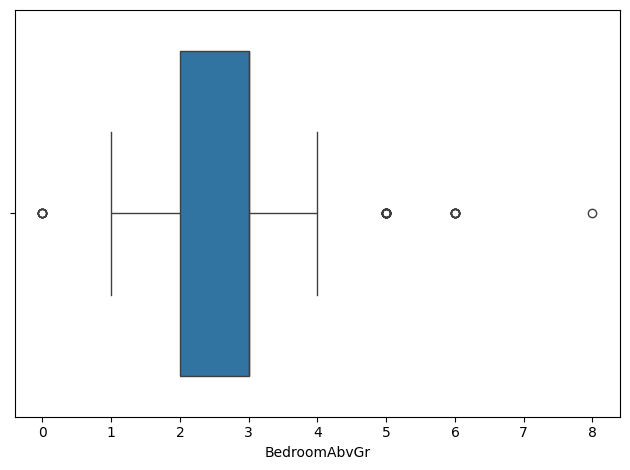

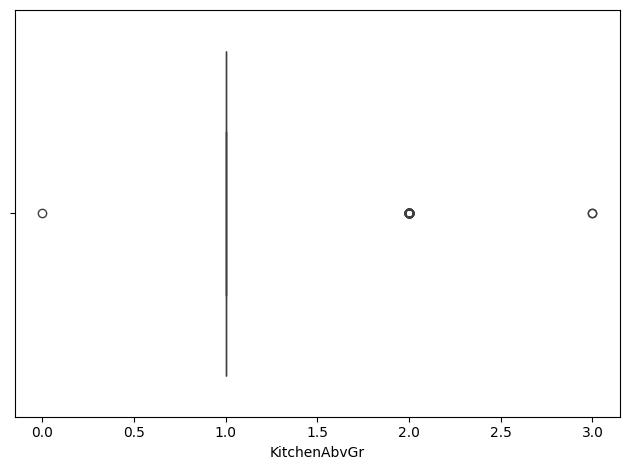

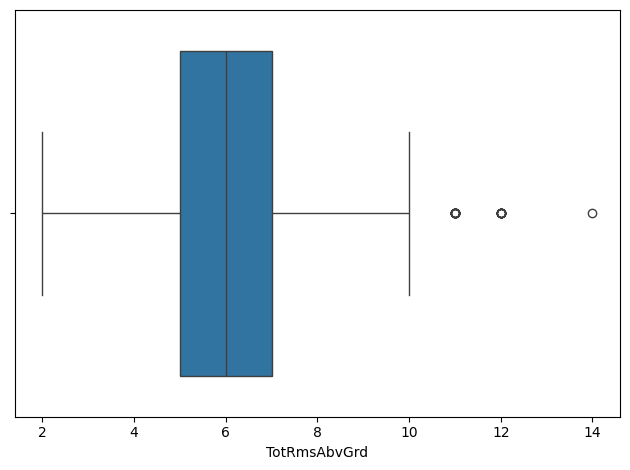

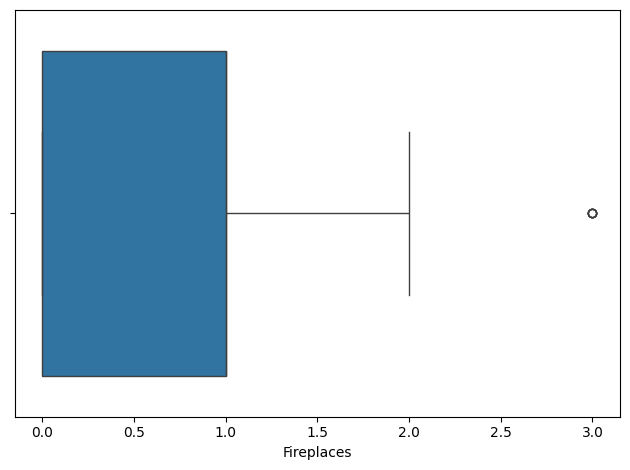

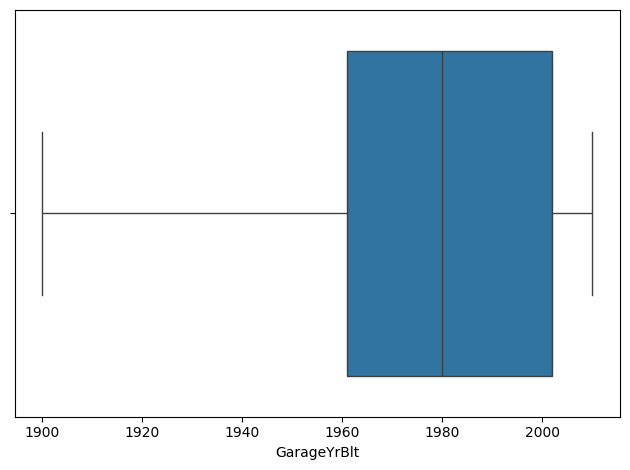

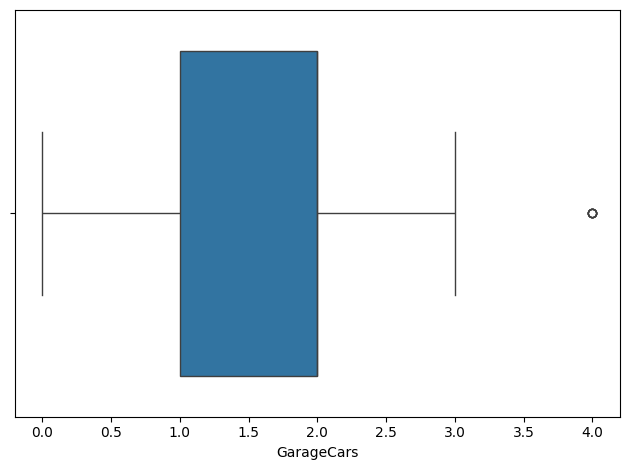

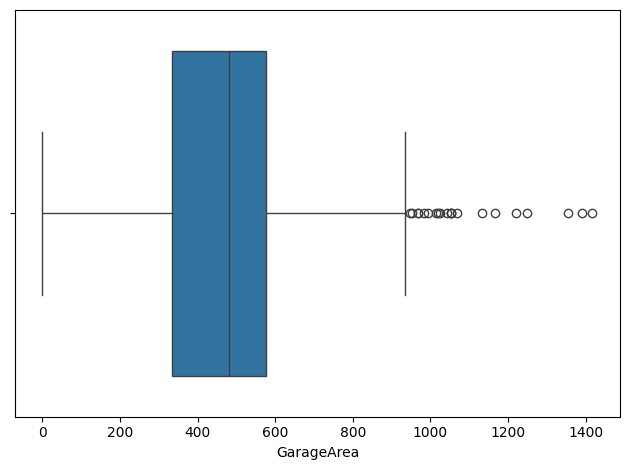

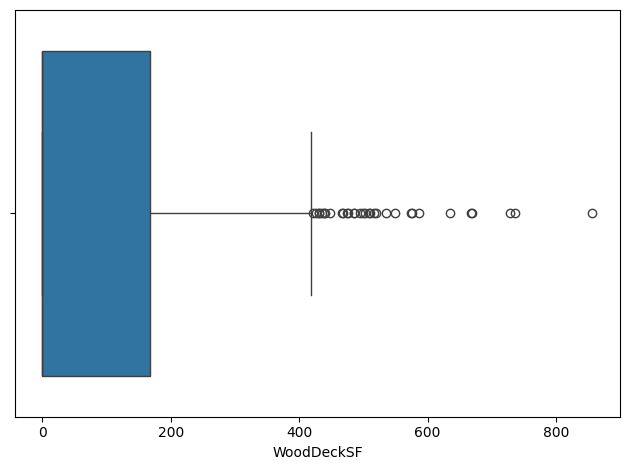

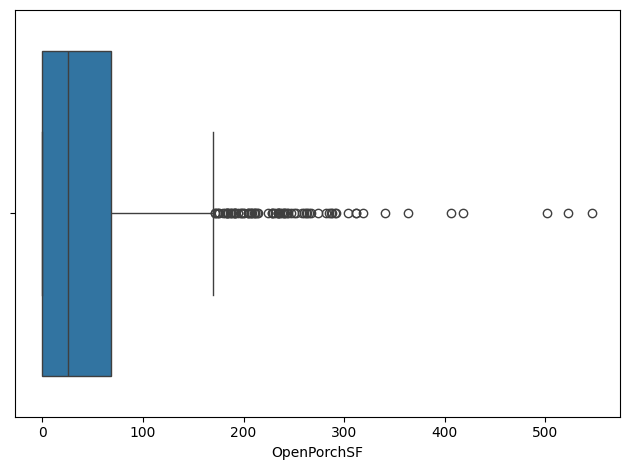

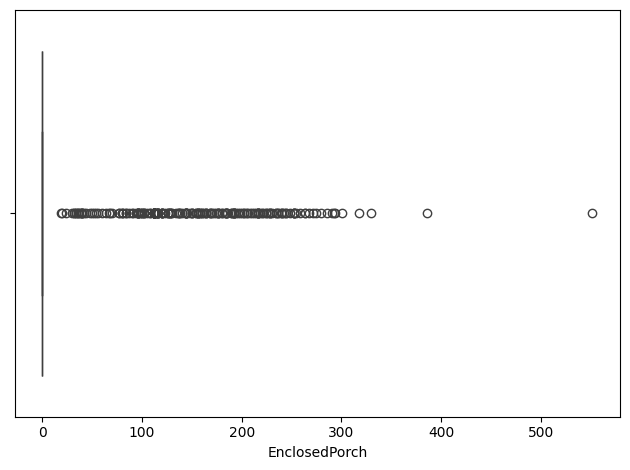

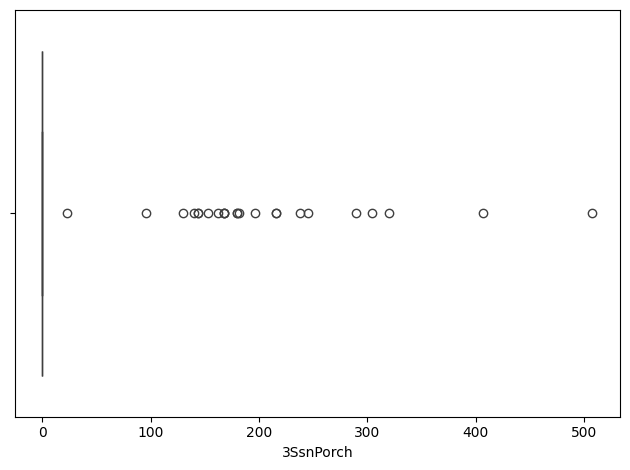

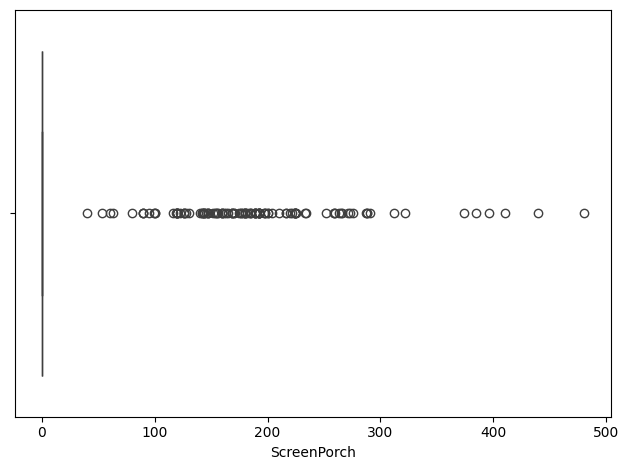

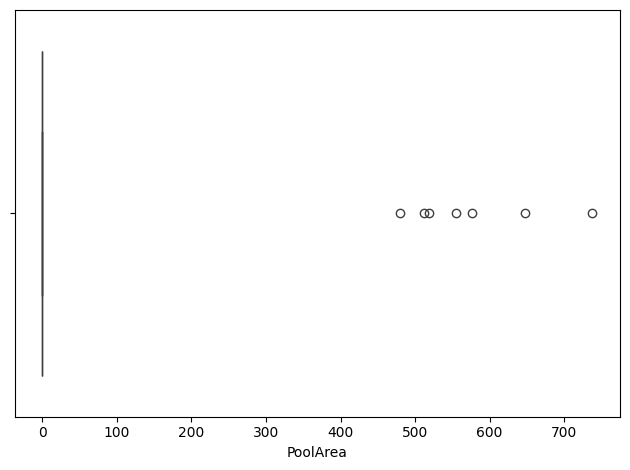

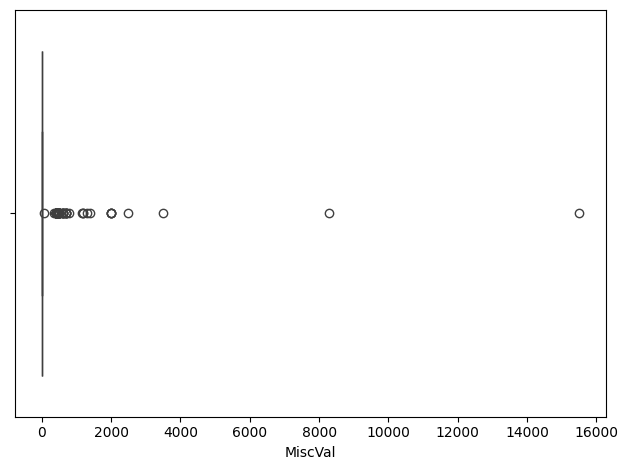

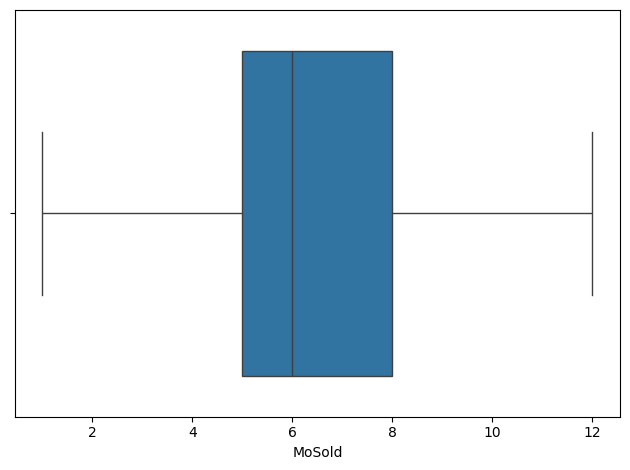

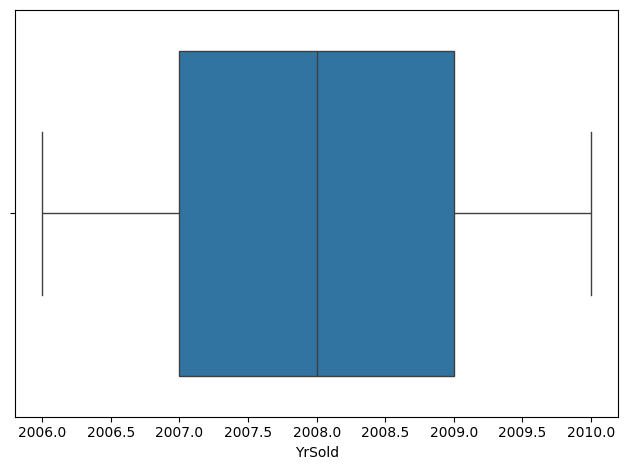

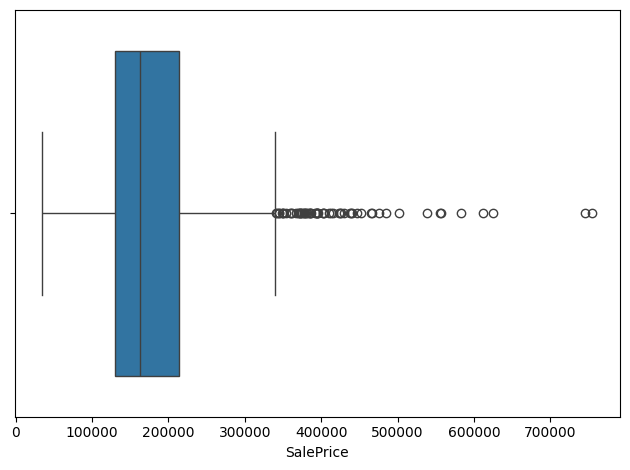

In [10]:
for i in dataset.select_dtypes(include= "number").columns:
  sns.boxplot(data=dataset,x=i)
  plt.tight_layout()
  plt.show()

In [11]:
numeric_columns = dataset.select_dtypes(include = "number").columns

numeric_features = [col for col in numeric_columns if col != 'SalePrice']

print(numeric_columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


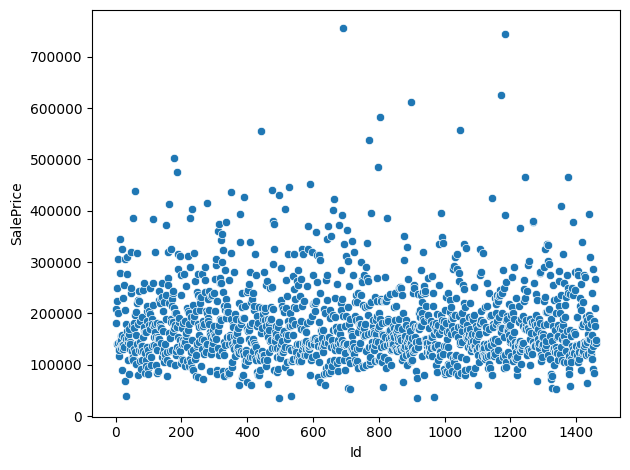

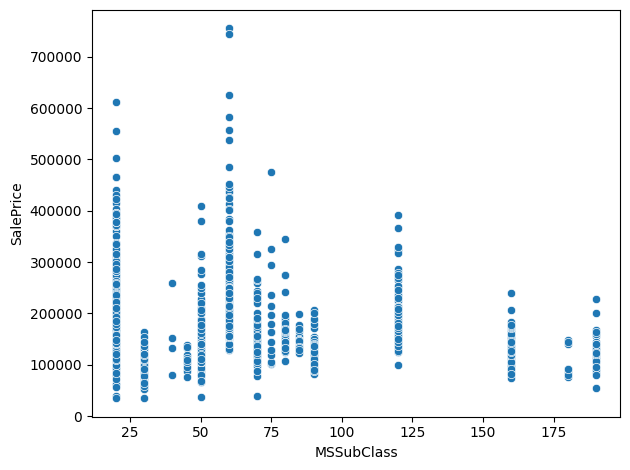

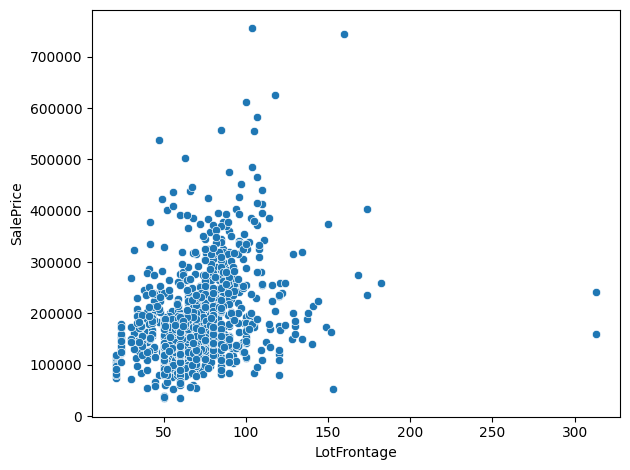

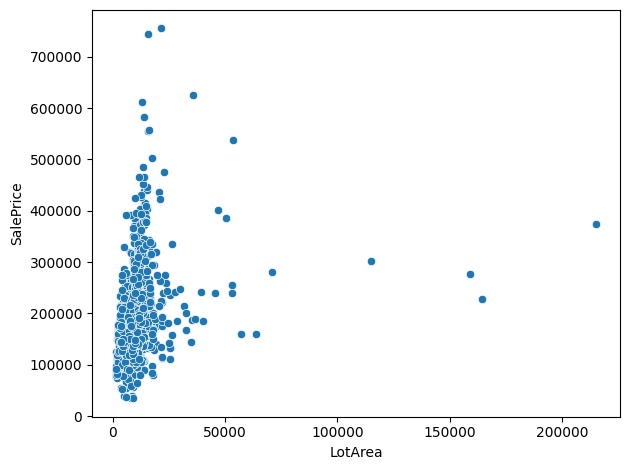

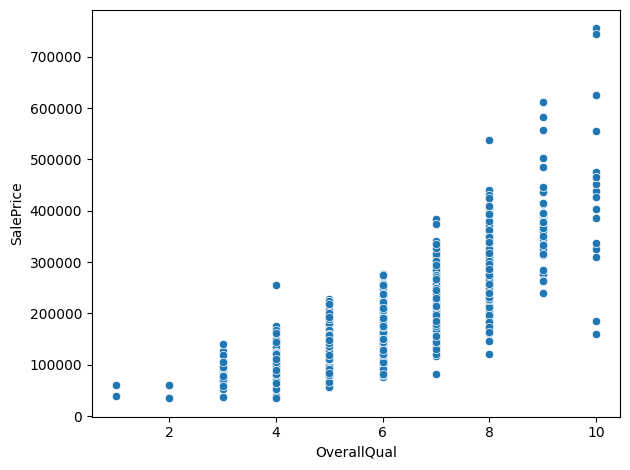

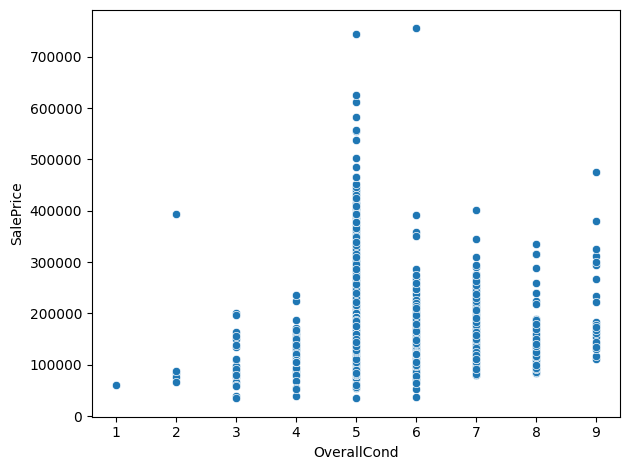

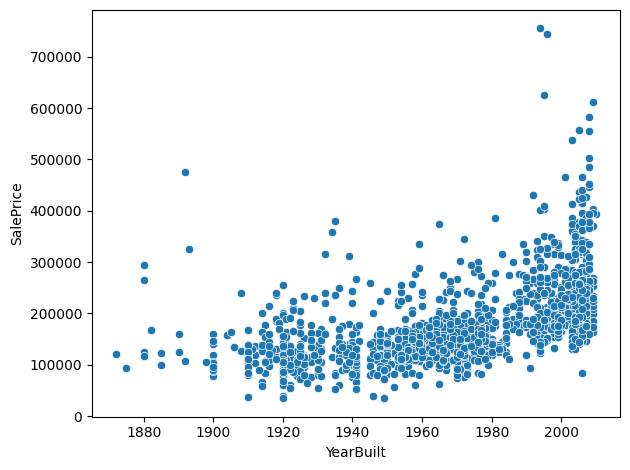

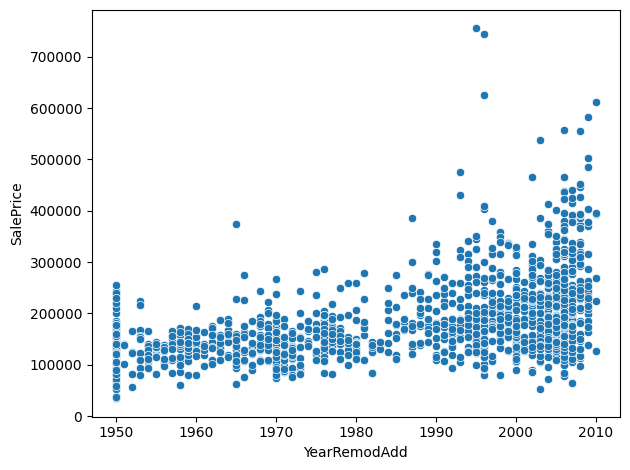

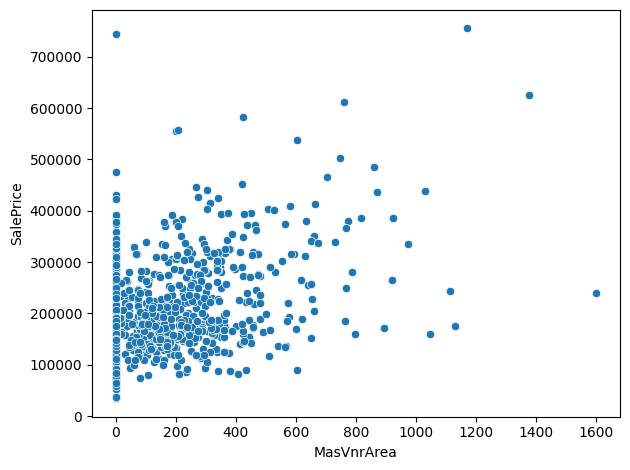

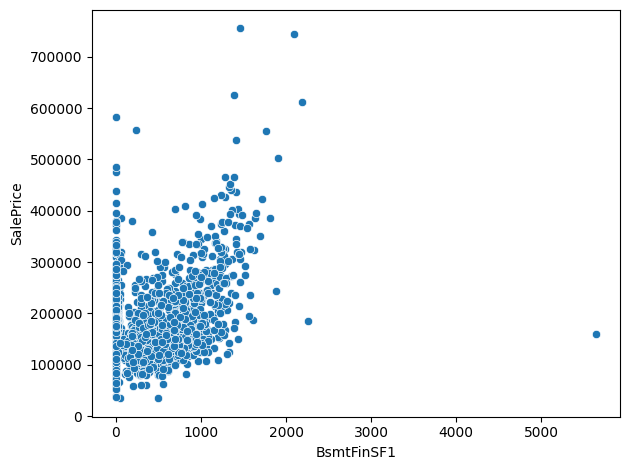

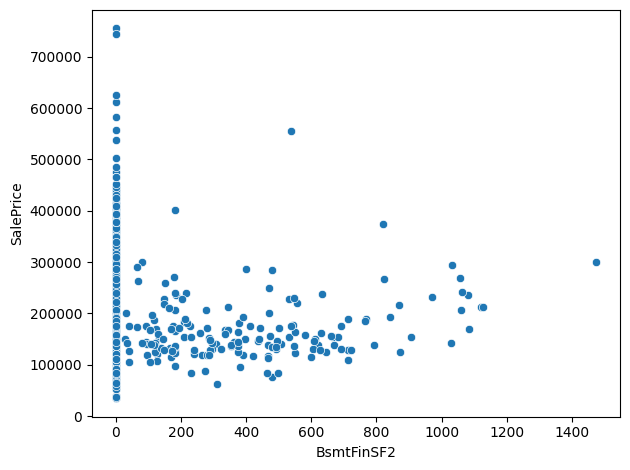

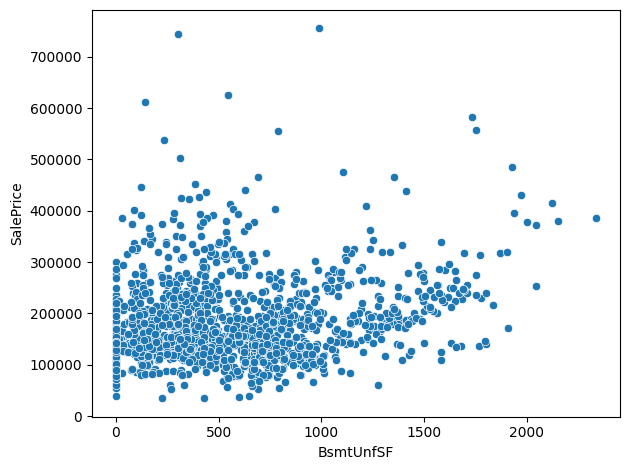

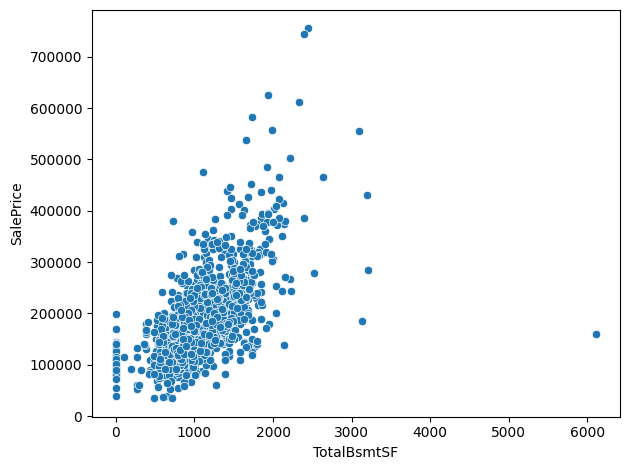

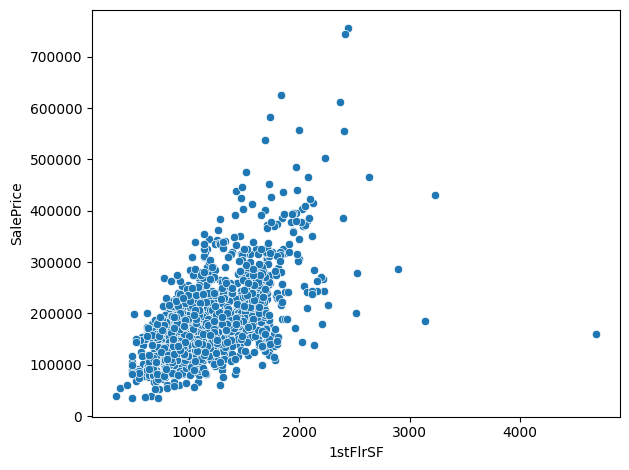

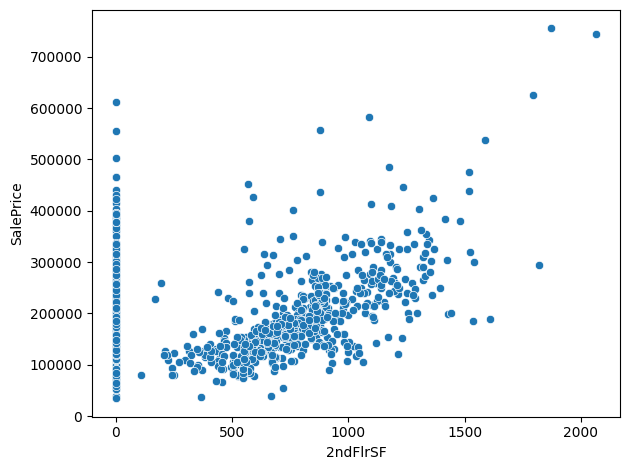

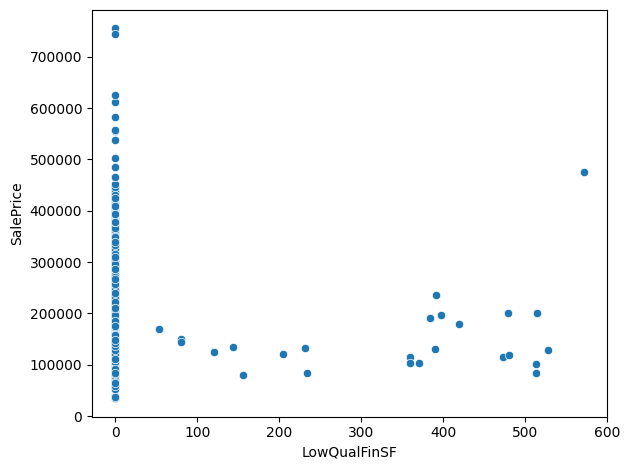

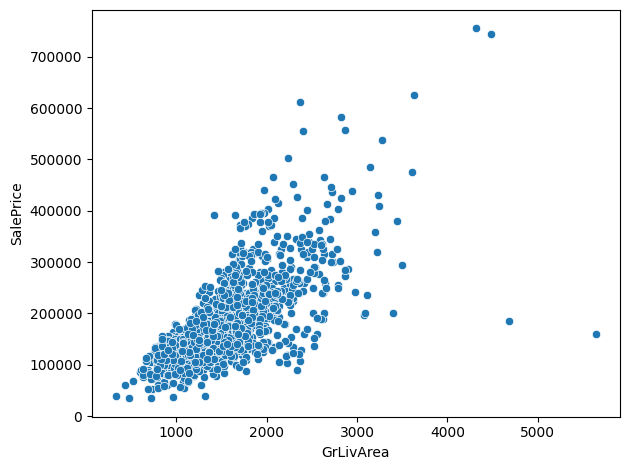

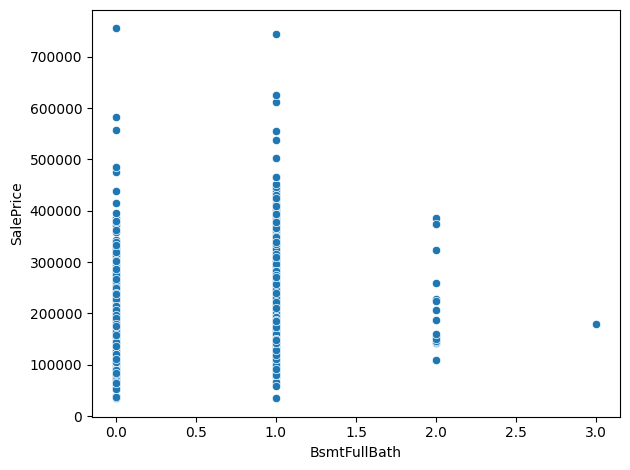

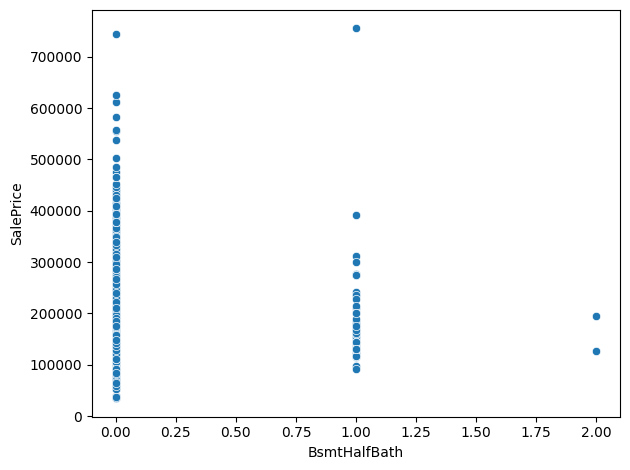

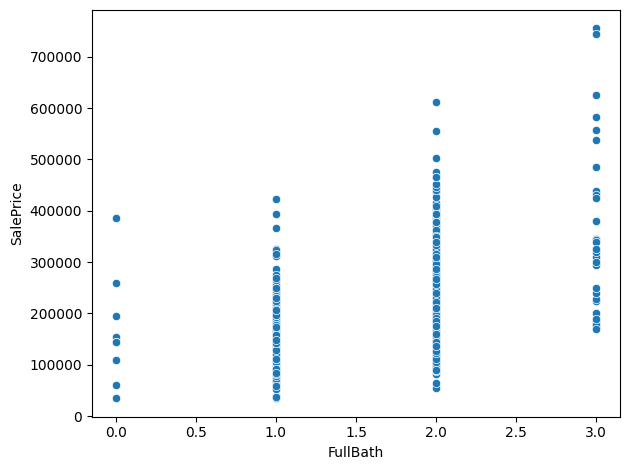

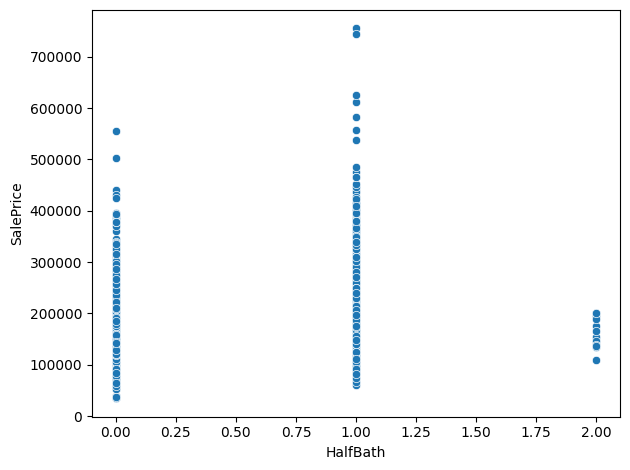

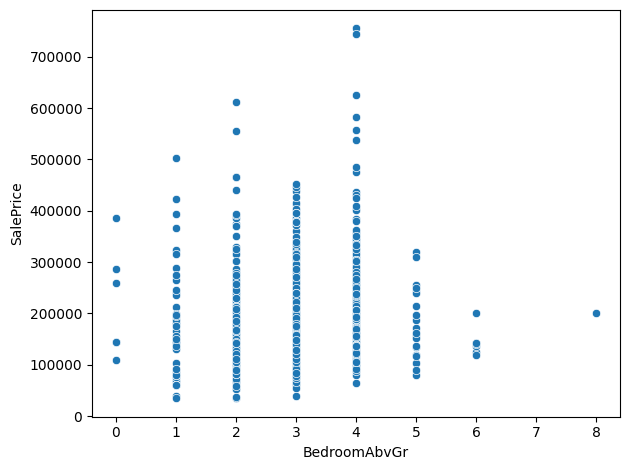

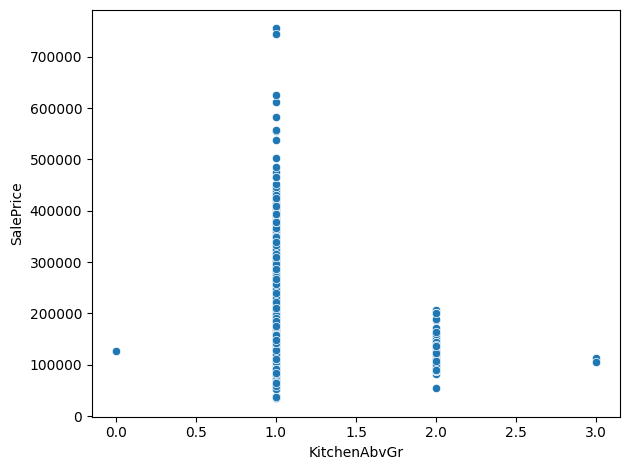

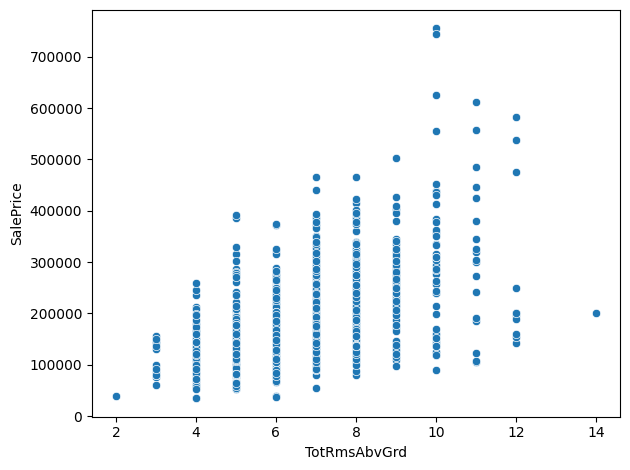

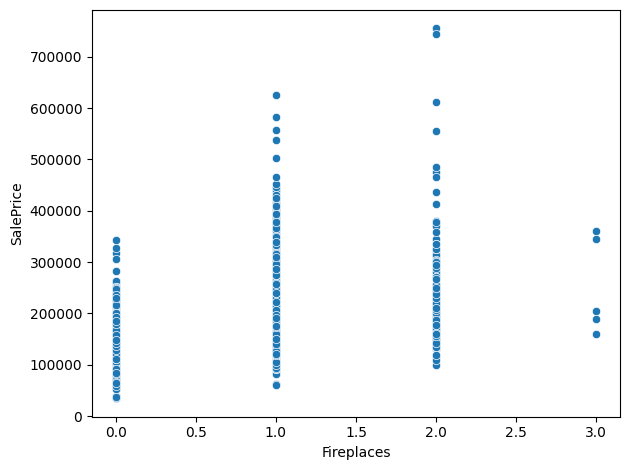

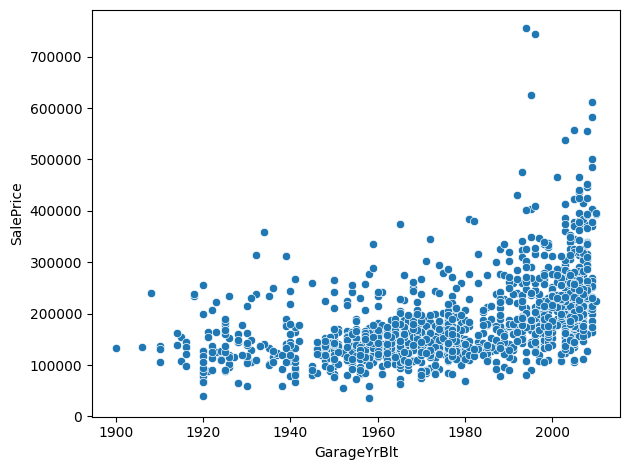

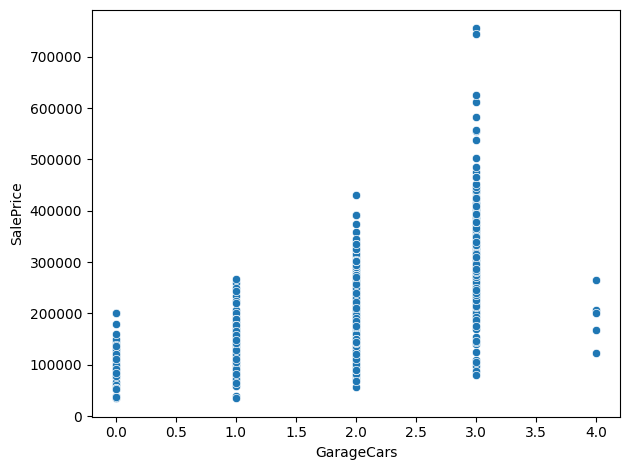

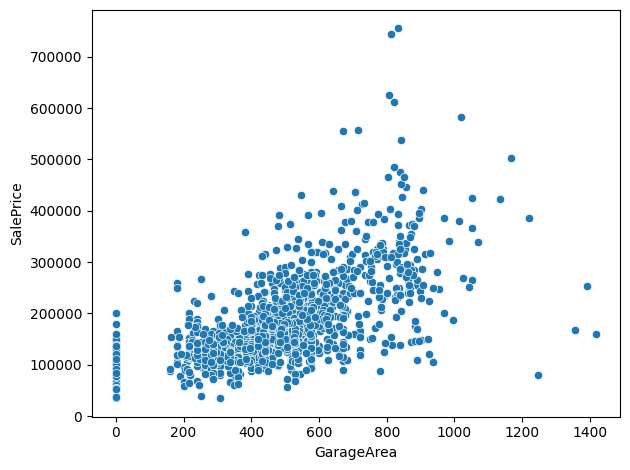

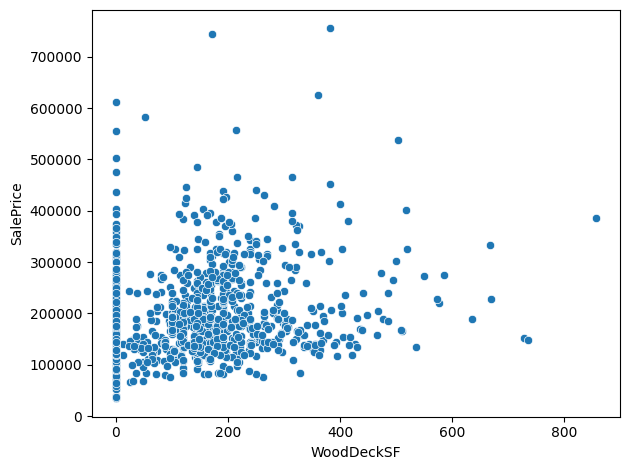

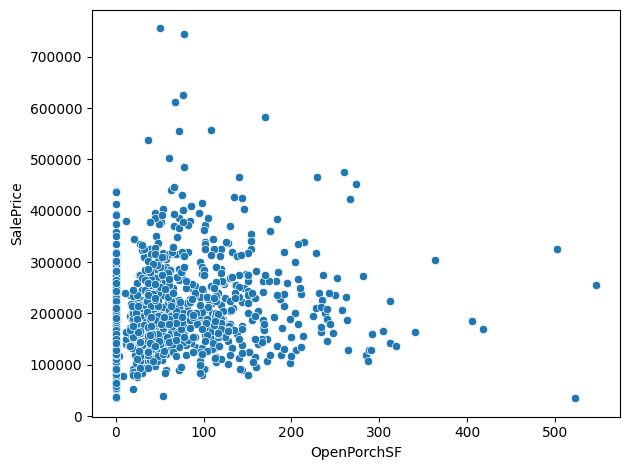

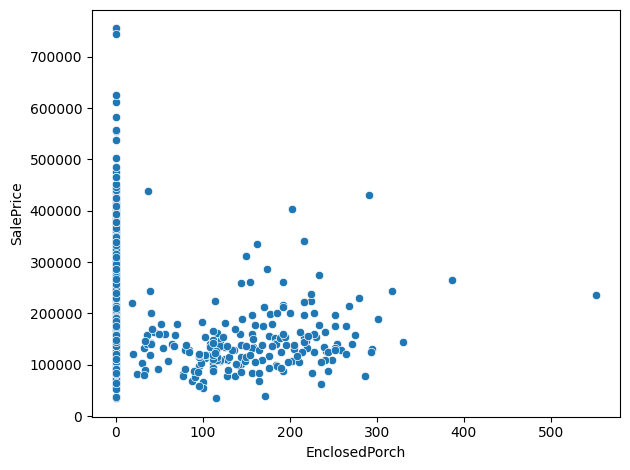

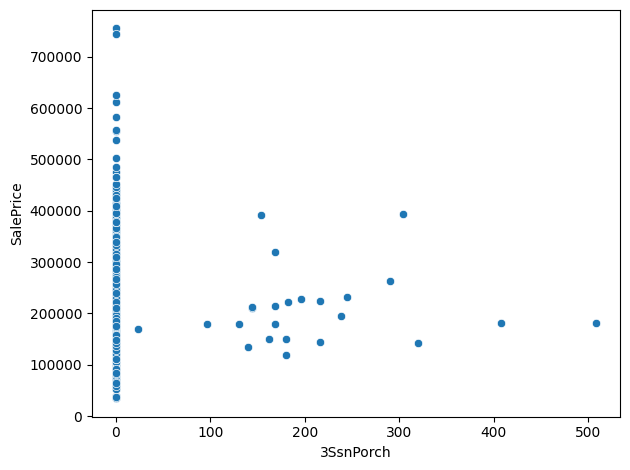

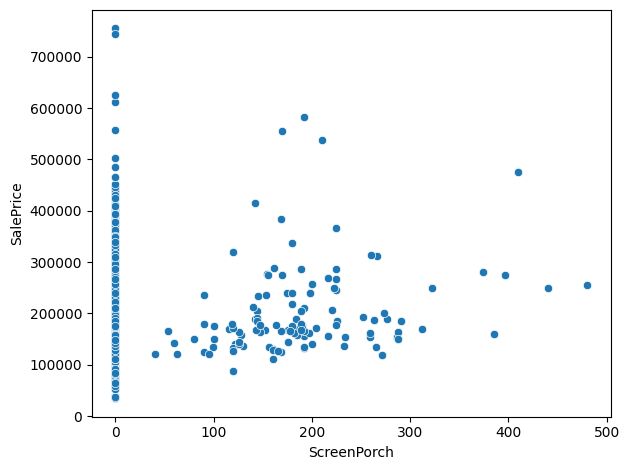

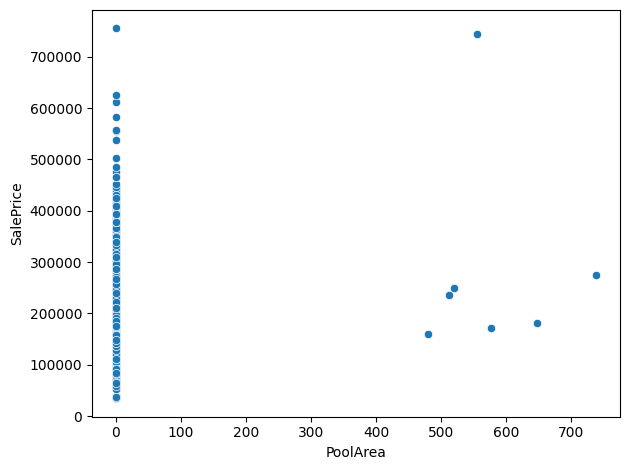

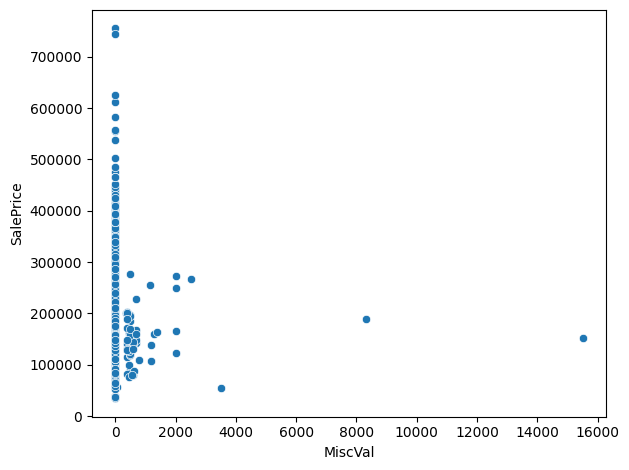

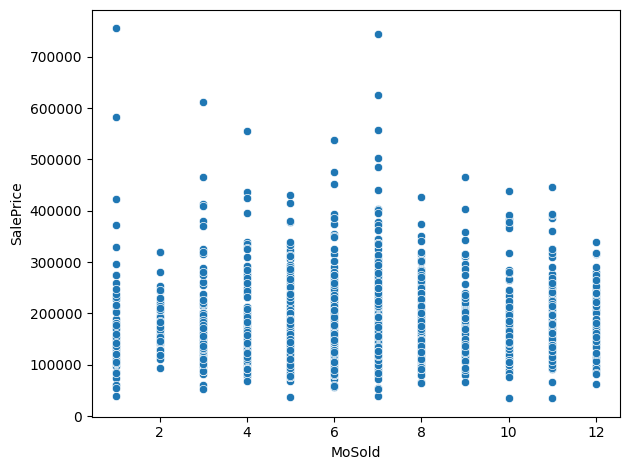

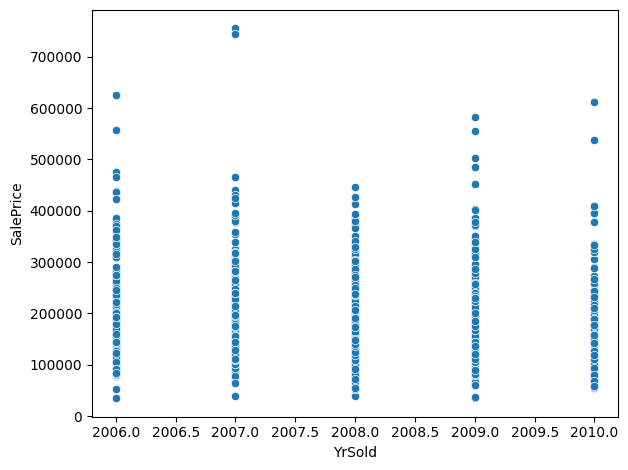

In [12]:
for i in numeric_features:
    sns.scatterplot(data=dataset, x=i, y='SalePrice')
    plt.tight_layout()
    plt.show()

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
missing_values = dataset.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values.to_frame().rename(columns={0: 'Missing Values'}))

              Missing Values
LotFrontage              259
Alley                   1369
MasVnrType               872
MasVnrArea                 8
BsmtQual                  37
BsmtCond                  37
BsmtExposure              38
BsmtFinType1              37
BsmtFinType2              38
Electrical                 1
FireplaceQu              690
GarageType                81
GarageYrBlt               81
GarageFinish              81
GarageQual                81
GarageCond                81
PoolQC                  1453
Fence                   1179
MiscFeature             1406


In [15]:
(missing_values/dataset.shape[0])*100

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [16]:
threshold = 0.5
dataset = dataset.dropna(thresh=int(threshold * len(dataset)), axis=1)

In [17]:
missing_values = dataset.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values.to_frame().rename(columns={0: 'Missing Values'}))

              Missing Values
LotFrontage              259
MasVnrArea                 8
BsmtQual                  37
BsmtCond                  37
BsmtExposure              38
BsmtFinType1              37
BsmtFinType2              38
Electrical                 1
FireplaceQu              690
GarageType                81
GarageYrBlt               81
GarageFinish              81
GarageQual                81
GarageCond                81


In [18]:
(missing_values/dataset.shape[0])*100

LotFrontage     17.739726
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

In [19]:
categorical_features = dataset.select_dtypes(include=['object']).columns

In [20]:
for feature in categorical_features:
    print(f"Unique values for {feature}:")
    print(dataset[feature].unique())
    print("\n")

Unique values for MSZoning:
['RL' 'RM' 'C (all)' 'FV' 'RH']


Unique values for Street:
['Pave' 'Grvl']


Unique values for LotShape:
['Reg' 'IR1' 'IR2' 'IR3']


Unique values for LandContour:
['Lvl' 'Bnk' 'Low' 'HLS']


Unique values for Utilities:
['AllPub' 'NoSeWa']


Unique values for LotConfig:
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


Unique values for LandSlope:
['Gtl' 'Mod' 'Sev']


Unique values for Neighborhood:
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


Unique values for Condition1:
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']


Unique values for Condition2:
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']


Unique values for BldgType:
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']


Unique values for HouseStyle:
['2Story' '1Story' '1.5Fin'

In [21]:
pd.set_option('display.max_rows', None)
unique_counts = dataset.nunique()
print(unique_counts)

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBa

In [22]:
duplicates_count = dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

Number of duplicate rows: 0


In [23]:
duplicate_ids = dataset[dataset.duplicated(subset=['Id'], keep=False)]
duplicate_ids.sort_values(by='Id', inplace=True)
duplicate_ids.head(6)

<ipython-input-23-c3de3c7d040b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_ids.sort_values(by='Id', inplace=True)


Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 76 columns]

In [24]:
dataset = dataset.drop(columns=['Id'])

In [25]:
categorical_cols = dataset.select_dtypes(include=['object']).columns
numerical_cols = dataset.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
Numerical Columns: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd'

In [26]:
missing_num = [col for col in missing_values.index if col in numerical_cols]
missing_cat = [col for col in missing_values.index if col in categorical_cols]

skewness = dataset[missing_num].skew()

print("Numerical Features with Missing Values:")
print(skewness)

Numerical Features with Missing Values:
LotFrontage    2.163569
MasVnrArea     2.669084
GarageYrBlt   -0.649415
dtype: float64


In [27]:
numeric_df = dataset.select_dtypes(include=['number'])
correlation = numeric_df.corr()['LotFrontage'].sort_values(ascending=False)

print(correlation)

LotFrontage      1.000000
1stFlrSF         0.457181
LotArea          0.426095
GrLivArea        0.402797
TotalBsmtSF      0.392075
TotRmsAbvGrd     0.352096
SalePrice        0.351799
GarageArea       0.344997
GarageCars       0.285691
Fireplaces       0.266639
BedroomAbvGr     0.263170
OverallQual      0.251646
BsmtFinSF1       0.233633
PoolArea         0.206167
FullBath         0.198769
MasVnrArea       0.193458
OpenPorchSF      0.151972
BsmtUnfSF        0.132644
YearBuilt        0.123349
BsmtFullBath     0.100949
YearRemodAdd     0.088866
WoodDeckSF       0.088521
2ndFlrSF         0.080177
GarageYrBlt      0.070250
3SsnPorch        0.070029
HalfBath         0.053532
BsmtFinSF2       0.049900
ScreenPorch      0.041383
LowQualFinSF     0.038469
MoSold           0.011200
EnclosedPorch    0.010700
YrSold           0.007450
MiscVal          0.003368
KitchenAbvGr    -0.006069
BsmtHalfBath    -0.007234
OverallCond     -0.059213
MSSubClass      -0.386347
Name: LotFrontage, dtype: float64


In [28]:
categorical_features = dataset.select_dtypes(include=['object']).columns
anova_results = {}

for col in categorical_features:
    unique_vals = dataset[col].nunique()
    if unique_vals > 1:
        groups = [dataset['LotFrontage'][dataset[col] == category].dropna() for category in dataset[col].unique()]
        f_stat, p_value = stats.f_oneway(*groups)
        anova_results[col] = p_value

anova_results = {k: v for k, v in sorted(anova_results.items(), key=lambda item: item[1])}

print("ANOVA Test Results (Categorical vs. LotFrontage):")
print(anova_results)

<ipython-input-28-9d12c44c2bd2>:8: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_value = stats.f_oneway(*groups)


ANOVA Test Results (Categorical vs. LotFrontage):
{'BldgType': 2.389898748978942e-72, 'Neighborhood': 1.9449880313279755e-50, 'MSZoning': 3.800293292683771e-34, 'LotShape': 4.0387740017869405e-20, 'LotConfig': 2.8888012172164797e-18, 'Condition1': 1.2601163534429517e-11, 'ExterQual': 1.1113685599979598e-10, 'Exterior2nd': 1.607832080769748e-08, 'Foundation': 7.591696057952576e-06, 'Exterior1st': 0.00021164481119448784, 'LandContour': 0.004208108752680465, 'Street': 0.15676251628598672, 'Utilities': nan, 'LandSlope': 0.008135645706202586, 'Condition2': nan, 'HouseStyle': 5.843202986548061e-05, 'RoofStyle': nan, 'RoofMatl': nan, 'SaleCondition': 0.0005600732398946991, 'SaleType': 0.0008327088762658123, 'ExterCond': 0.4398144956602865, 'BsmtQual': nan, 'BsmtCond': nan, 'BsmtExposure': nan, 'BsmtFinType1': nan, 'BsmtFinType2': nan, 'Heating': nan, 'KitchenQual': 1.5944756104815578e-11, 'PavedDrive': 0.004432350809095606, 'HeatingQC': 0.009128644204751627, 'CentralAir': 0.012991642658232699

In [29]:
dataset['LotFrontage'] = dataset.groupby(['BldgType', 'Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [30]:
null_lotfrontage = dataset['LotFrontage'].isnull().sum()
print(f"Number of null values in 'LotFrontage' column: {null_lotfrontage}")

Number of null values in 'LotFrontage' column: 2


In [31]:
dataset['MasVnrArea'].fillna(0, inplace=True)

<ipython-input-31-bb38d40a9fd3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['MasVnrArea'].fillna(0, inplace=True)


In [32]:
null_MasVnrArea = dataset['MasVnrArea'].isnull().sum()
print(f"Number of null values in 'MasVnrArea' column: {null_MasVnrArea}")

Number of null values in 'MasVnrArea' column: 0


In [33]:
print("Categorical Features with Missing Values:")
print(missing_cat)

Categorical Features with Missing Values:
['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


In [34]:
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    print(f"{col}: {dataset[col].nunique()} unique values")
    print(dataset[col].unique(), "\n")  # Display unique values

BsmtQual: 4 unique values
['Gd' 'TA' 'Ex' nan 'Fa'] 

BsmtCond: 4 unique values
['TA' 'Gd' nan 'Fa' 'Po'] 

BsmtExposure: 4 unique values
['No' 'Gd' 'Mn' 'Av' nan] 

BsmtFinType1: 6 unique values
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ'] 

BsmtFinType2: 6 unique values
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ'] 

Electrical: 5 unique values
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan] 

FireplaceQu: 5 unique values
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po'] 

GarageType: 6 unique values
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types'] 

GarageFinish: 3 unique values
['RFn' 'Unf' 'Fin' nan] 

GarageQual: 5 unique values
['TA' 'Fa' 'Gd' nan 'Ex' 'Po'] 

GarageCond: 5 unique values
['TA' 'Fa' nan 'Gd' 'Po' 'Ex'] 



In [35]:
print("Missing values BEFORE imputation:\n")
print(dataset[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
               'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
               'Electrical', 'FireplaceQu']].isnull().sum())

garage_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
has_garage = dataset[garage_cols].notnull().any(axis=1)

dataset.loc[~has_garage, garage_cols] = "NA"

for col in garage_cols:
    dataset[col] = dataset.groupby('GarageType')[col].transform(lambda x: x.fillna(x.mode()[0]))

bsmt_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
has_basement = dataset[bsmt_cols].notnull().any(axis=1)

dataset.loc[~has_basement, bsmt_cols] = "NA"

for col in bsmt_cols:
    dataset[col] = dataset.groupby('BsmtQual')[col].transform(lambda x: x.fillna(x.mode()[0]))

dataset['Electrical'].fillna(dataset['Electrical'].mode()[0], inplace=True)

dataset['FireplaceQu'].fillna("NA", inplace=True)

print("\nMissing values AFTER imputation:\n")
print(dataset[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
               'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
               'Electrical', 'FireplaceQu']].isnull().sum())

Missing values BEFORE imputation:

GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
dtype: int64

Missing values AFTER imputation:

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
dtype: int64


<ipython-input-35-52602d5920e3>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Electrical'].fillna(dataset['Electrical'].mode()[0], inplace=True)
<ipython-input-35-52602d5920e3>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [36]:
print("Missing GarageYrBlt:", dataset['GarageYrBlt'].isnull().sum())
print("Rows where GarageYrBlt is missing but GarageType is NOT 'NA':")
print(dataset[dataset['GarageYrBlt'].isnull() & (dataset['GarageType'] != "NA")][['GarageType', 'GarageYrBlt', 'YearBuilt']])

Missing GarageYrBlt: 81
Rows where GarageYrBlt is missing but GarageType is NOT 'NA':
Empty DataFrame
Columns: [GarageType, GarageYrBlt, YearBuilt]
Index: []


In [37]:
dataset.loc[dataset['GarageYrBlt'].isnull(), 'GarageYrBlt'] = 0

dataset['GarageYrBlt'] = dataset['GarageYrBlt'].astype(int)

print("Missing GarageYrBlt AFTER filling:", dataset['GarageYrBlt'].isnull().sum())

Missing GarageYrBlt AFTER filling: 0


In [38]:
dataset.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      2
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [39]:
print("Missing LotFrontage:", dataset['LotFrontage'].isnull().sum())
print(dataset[dataset['LotFrontage'].isnull()][['Neighborhood', 'BldgType', 'LotFrontage']])

Missing LotFrontage: 2
     Neighborhood BldgType  LotFrontage
335        Timber   2fmCon          NaN
1190      Mitchel   2fmCon          NaN


In [40]:
dataset['LotFrontage'].fillna(dataset[dataset['BldgType'] == '2fmCon']['LotFrontage'].median(), inplace=True)

<ipython-input-40-7459e3a7c599>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['LotFrontage'].fillna(dataset[dataset['BldgType'] == '2fmCon']['LotFrontage'].median(), inplace=True)


In [41]:
dataset.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [42]:
num_cols = dataset.select_dtypes(include=['int64', 'float64']).columns
outliers = {}
for col in num_cols:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = ((dataset[col] < lower_bound) | (dataset[col] > upper_bound)).sum()

outliers_df = pd.DataFrame(outliers.items(), columns=['Feature', 'Outlier Count'])
print(outliers_df.sort_values(by='Outlier Count', ascending=False))

          Feature  Outlier Count
29  EnclosedPorch            208
9      BsmtFinSF2            167
4     OverallCond            125
31    ScreenPorch            116
0      MSSubClass            103
7      MasVnrArea             98
1     LotFrontage             92
17   BsmtHalfBath             82
24    GarageYrBlt             81
28    OpenPorchSF             77
2         LotArea             69
21   KitchenAbvGr             68
36      SalePrice             61
11    TotalBsmtSF             61
33        MiscVal             52
20   BedroomAbvGr             35
27     WoodDeckSF             32
15      GrLivArea             31
22   TotRmsAbvGrd             30
10      BsmtUnfSF             29
14   LowQualFinSF             26
30      3SsnPorch             24
26     GarageArea             21
12       1stFlrSF             20
5       YearBuilt              7
8      BsmtFinSF1              7
32       PoolArea              7
23     Fireplaces              5
25     GarageCars              5
3     Over

In [43]:
# List of features to cap extreme values
cap_features = ['EnclosedPorch', 'ScreenPorch', 'OpenPorchSF', '3SsnPorch', 'WoodDeckSF',
                'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFinSF1',
                'MasVnrArea', 'Fireplaces', 'GarageArea', 'GarageCars']

for col in cap_features:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dataset[col] = np.clip(dataset[col], lower_bound, upper_bound)

In [44]:
skewed_cols = ['LotArea', 'LotFrontage', 'SalePrice', 'GrLivArea']

# Apply log transformation
for col in skewed_cols:
    dataset[col] = np.log1p(dataset[col])  # log1p(x) = log(x + 1) to handle zeros

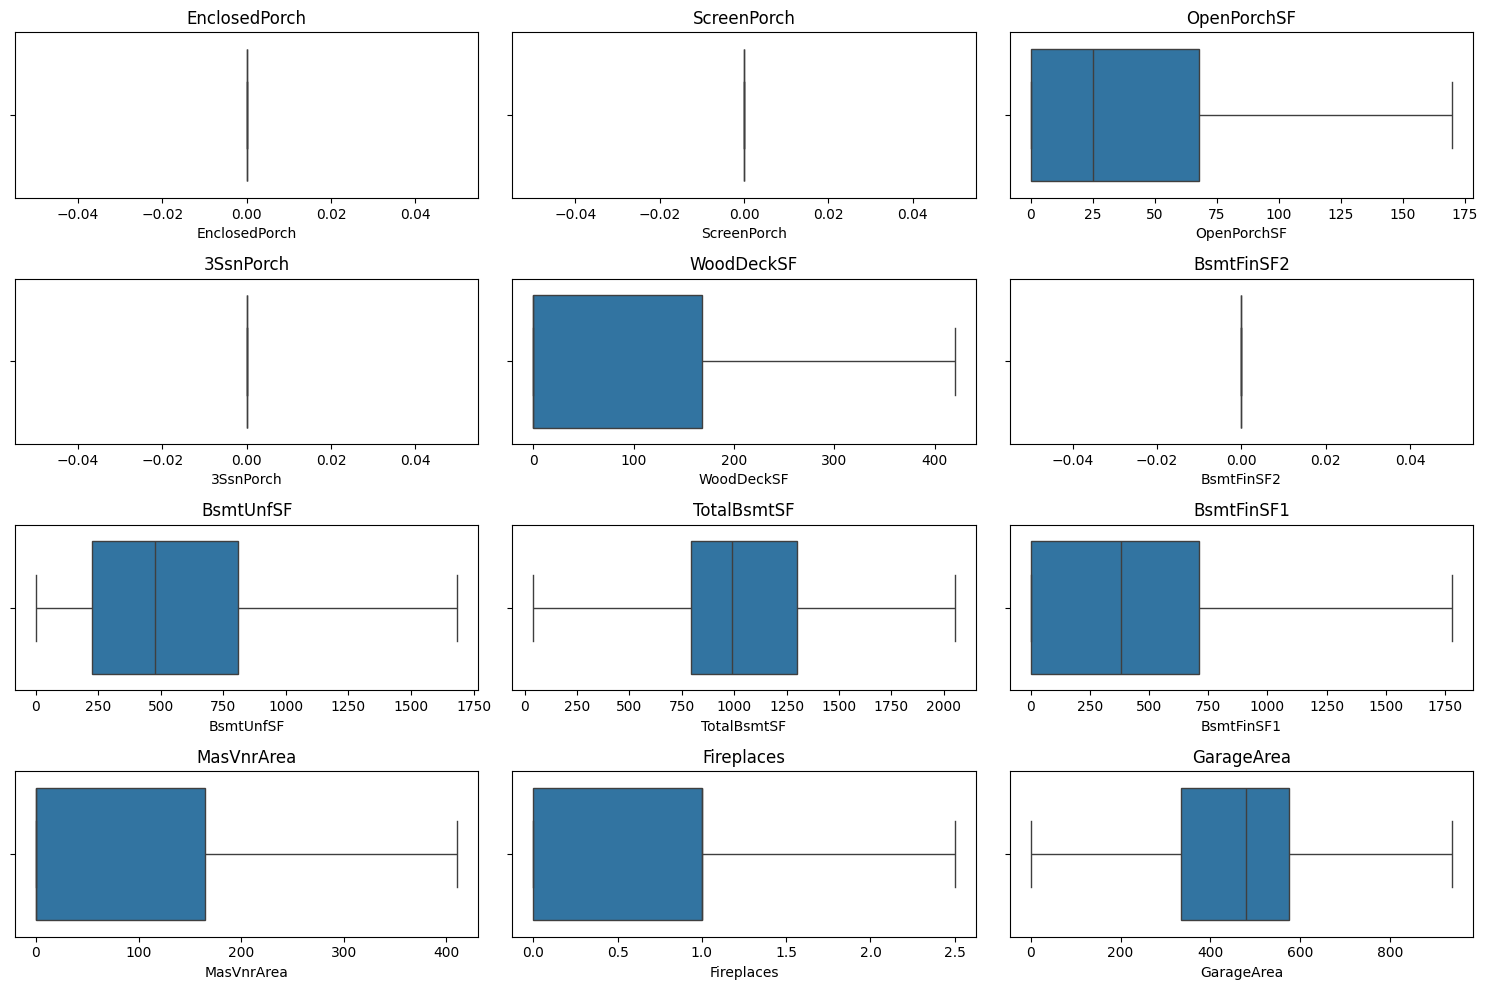

In [45]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(cap_features[:12]):  # Show first 12 capped features
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=dataset[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [46]:
print(dataset[skewed_cols].skew().sort_values(ascending=False))

SalePrice      0.121347
GrLivArea     -0.006140
LotArea       -0.137404
LotFrontage   -0.846625
dtype: float64


In [47]:
num_cols = dataset.select_dtypes(include=['int64', 'float64']).columns
outliers = {}
for col in num_cols:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = ((dataset[col] < lower_bound) | (dataset[col] > upper_bound)).sum()

outliers_df = pd.DataFrame(outliers.items(), columns=['Feature', 'Outlier Count'])
print(outliers_df.sort_values(by='Outlier Count', ascending=False))

          Feature  Outlier Count
2         LotArea            132
1     LotFrontage            128
4     OverallCond            125
0      MSSubClass            103
17   BsmtHalfBath             82
24    GarageYrBlt             81
21   KitchenAbvGr             68
33        MiscVal             52
20   BedroomAbvGr             35
22   TotRmsAbvGrd             30
36      SalePrice             28
14   LowQualFinSF             26
12       1stFlrSF             20
15      GrLivArea             10
5       YearBuilt              7
32       PoolArea              7
13       2ndFlrSF              2
3     OverallQual              2
16   BsmtFullBath              1
27     WoodDeckSF              0
35         YrSold              0
34         MoSold              0
31    ScreenPorch              0
30      3SsnPorch              0
29  EnclosedPorch              0
28    OpenPorchSF              0
11    TotalBsmtSF              0
26     GarageArea              0
25     GarageCars              0
23     Fir

In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [49]:
duplicates_count = dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

Number of duplicate rows: 0


In [50]:
dataset.to_csv("/content/drive/My Drive/Machine Learning/cleaned_dataset.csv", index=False)

## Feature Engineering

In [81]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning/cleaned_dataset.csv')

In [82]:
# Check for non-finite values (NaN, inf, -inf)
non_finite_counts = (dataset.isna().sum() + (dataset == np.inf).sum() + (dataset == -np.inf).sum())
print("Non-finite values in each column:")
print(non_finite_counts[non_finite_counts > 0])

Non-finite values in each column:
BsmtQual         37
BsmtCond         37
BsmtExposure     37
BsmtFinType1     37
BsmtFinType2     37
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64


In [83]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

### Creating new features

In [84]:
dataset['TotalBath'] = dataset['FullBath'] + 0.5 * dataset['HalfBath'] + dataset['BsmtFullBath'] + 0.5 * dataset['BsmtHalfBath']
dataset['TotalPorchSF'] = dataset['OpenPorchSF'] + dataset['EnclosedPorch'] + dataset['3SsnPorch'] + dataset['ScreenPorch']
dataset['HouseAge'] = dataset['YrSold'] - dataset['YearBuilt']
dataset['IsRemodeled'] = (dataset['YearBuilt'] != dataset['YearRemodAdd']).astype(int)
dataset

MSSubClass MSZoning  LotFrontage    LotArea Street LotShape LandContour  \
0             60       RL     4.189655   9.042040   Pave      Reg         Lvl   
1             20       RL     4.394449   9.169623   Pave      Reg         Lvl   
2             60       RL     4.234107   9.328212   Pave      IR1         Lvl   
3             70       RL     4.110874   9.164401   Pave      IR1         Lvl   
4             60       RL     4.442651   9.565284   Pave      IR1         Lvl   
5             50       RL     4.454347   9.555064   Pave      IR1         Lvl   
6             20       RL     4.330733   9.218804   Pave      Reg         Lvl   
7             60       RL     4.394449   9.247925   Pave      IR1         Lvl   
8             50       RM     3.951244   8.719481   Pave      Reg         Lvl   
9            190       RL     3.931826   8.912069   Pave      Reg         Lvl   
10            20       RL     4.262680   9.323758   Pave      Reg         Lvl   
11            60       RL     4.454347   9.386392   Pave      IR1         Lvl   
12            20       RL     4.276666   9.470317   Pave      IR2         Lvl   
13            20       RL     4.521789   9.273597   Pave      IR1         Lvl   
14            20       RL     4.304065   9.298443   Pave      IR1         Lvl   
15            45       RM     3.951244   8.719481   Pave      Reg         Lvl   
16            20       RL     4.304065   9.327412   Pave      IR1         Lvl   
17            90       RL     4.290459   9.286560   Pave      Reg         Lvl   
18            20       RL     4.204693   9.524859   Pave      Reg         Lvl   
19            20       RL     4.262680   8.930759   Pave      Reg         Lvl   
20            60       RL     4.624973   9.562123   Pave      IR1         Lvl   
21            45       RM     4.060443   8.915969   Pave      Reg         Bnk   
22            20       RL     4.330733   9.184304   Pave      Reg         Lvl   
23           120       RM     3.806662   8.348775   Pave      Reg         Lvl   
24            20       RL     4.276666   9.017605   Pave      IR1         Lvl   
25            20       RL     4.709530   9.563178   Pave      Reg         Lvl   
26            20       RL     4.110874   8.881975   Pave      Reg         Lvl   
27            20       RL     4.595120   9.348275   Pave      Reg         Lvl   
28            20       RL     3.871201   9.700269   Pave      IR1         Lvl   
29            30       RM     4.110874   8.752265   Pave      IR1         Lvl   
30            70  C (all)     3.931826   9.047939   Pave      Reg         Lvl   
31            20       RL     4.276666   9.053102   Pave      IR1         Lvl   
32            20       RL     4.454347   9.310186   Pave      Reg         Lvl   
33            20       RL     4.262680   9.264165   Pave      IR1         Lvl   
34           120       RL     4.110874   8.897546   Pave      Reg         Lvl   
35            60       RL     4.691348   9.504427   Pave      Reg         Lvl   
36            20       RL     4.727388   9.292842   Pave      Reg         Lvl   
37            20       RL     4.317488   9.051696   Pave      Reg         Lvl   
38            20       RL     4.234107   8.977525   Pave      Reg         Lvl   
39            90       RL     4.189655   8.706325   Pave      Reg         Lvl   
40            20       RL     4.442651   9.066355   Pave      Reg         Lvl   
41            20       RL     4.753590   9.735424   Pave      Reg         Lvl   
42            85       RL     4.317488   9.124891   Pave      IR1         Lvl   
43            20       RL     4.262680   9.127067   Pave      IR1         Lvl   
44            20       RL     4.262680   8.980424   Pave      Reg         Lvl   
45           120       RL     4.127134   8.943637   Pave      Reg         Lvl   
46            50       RL     3.891820   9.458996   Pave      IR1         Lvl   
47            20       FV     4.442651   9.314430   Pave      Reg         Lvl   
48           190       RM     3.52636

In [85]:
dataset["TotalSqFt"] = dataset["GrLivArea"] + dataset["TotalBsmtSF"] + dataset["GarageArea"]

In [86]:
dataset["HasGarage"]   = (dataset["GarageArea"] > 0).astype(int)

In [87]:
dataset["QualitySize"]  = dataset["OverallQual"] * dataset["GrLivArea"]

### Mapping Features

In [88]:
# Mapping for basement quality
#Revesisit for better accuracy
bsmt_fin_type_map = {'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
dataset['BsmtFinType1'] = dataset['BsmtFinType1'].map(bsmt_fin_type_map)
dataset['BsmtFinType2'] = dataset['BsmtFinType2'].map(bsmt_fin_type_map)

# Create new features
dataset['TotalBsmtFinScore'] = (
    dataset['BsmtFinSF1'] * dataset['BsmtFinType1'] +
    dataset['BsmtFinSF2'] * dataset['BsmtFinType2']
)

dataset['BsmtFinRatio'] = (
    (dataset['BsmtFinSF1'] + dataset['BsmtFinSF2']) / dataset['TotalBsmtSF']
).fillna(0)

# Display dataset
print(dataset.head())


   MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0          60       RL     4.189655  9.042040   Pave      Reg         Lvl   
1          20       RL     4.394449  9.169623   Pave      Reg         Lvl   
2          60       RL     4.234107  9.328212   Pave      IR1         Lvl   
3          70       RL     4.110874  9.164401   Pave      IR1         Lvl   
4          60       RL     4.442651  9.565284   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ...  SalePrice TotalBath TotalPorchSF  \
0    AllPub    Inside       Gtl  ...  12.247699       3.5           61   
1    AllPub       FR2       Gtl  ...  12.109016       2.5            0   
2    AllPub    Inside       Gtl  ...  12.317171       3.5           42   
3    AllPub    Corner       Gtl  ...  11.849405       2.0           35   
4    AllPub       FR2       Gtl  ...  12.429220       3.5           84   

  HouseAge IsRemodeled    TotalSqFt  HasGarage  QualitySize  \
0        5           0  1411.

In [89]:
nbhd_map = dataset.groupby("Neighborhood")["SalePrice"].median()
dataset["Neighborhood"] = dataset["Neighborhood"].map(nbhd_map)
dataset["NeighborhoodQuality"] = dataset["Neighborhood"] * dataset["OverallQual"]


In [90]:
quality_map = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}
for col in ["ExterQual", "KitchenQual", "HeatingQC"]:
    if col in dataset.columns:
        dataset[col + "_ordinal"] = dataset[col].map(quality_map)
        dataset[col + "_ordinal"]  = dataset[col].map(quality_map)

In [91]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 88 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MSSubClass           1460 non-null   int64  
 1   MSZoning             1460 non-null   object 
 2   LotFrontage          1460 non-null   float64
 3   LotArea              1460 non-null   float64
 4   Street               1460 non-null   object 
 5   LotShape             1460 non-null   object 
 6   LandContour          1460 non-null   object 
 7   Utilities            1460 non-null   object 
 8   LotConfig            1460 non-null   object 
 9   LandSlope            1460 non-null   object 
 10  Neighborhood         1460 non-null   float64
 11  Condition1           1460 non-null   object 
 12  Condition2           1460 non-null   object 
 13  BldgType             1460 non-null   object 
 14  HouseStyle           1460 non-null   object 
 15  OverallQual          1460 non-null   i

### Drop features

In [92]:
# Example: Dropping redundant or low-variance features
dataset['Street'].unique()
dataset = dataset.drop(['Street'], axis=1)

In [93]:
zero_count = (dataset['TotalBsmtSF'] == 0).sum()
print("Number of zero values in 'TotalBsmtSF':", zero_count)

Number of zero values in 'TotalBsmtSF': 0


In [94]:
dataset['BsmtFinSF2'].unique()
#dataset['BsmtFinSF1'].unique()

array([0])

In [95]:
columns_to_drop = [
    'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath',  # Used for TotalBath
    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',  # Used for TotalPorchSF
    'GrLivArea', 'TotalBsmtSF', 'GarageArea',  # Used for TotalSqFt
    'OverallQual', 'GrLivArea',  # Used for QualitySize
     'BsmtFinSF2', 'BsmtFinType2','BsmtFinType1','BsmtFinSF1',  # Used for TotalBsmtFinScore
    'Neighborhood',  # Used for NeighborhoodQuality
    'ExterQual', 'KitchenQual', 'HeatingQC',  # Used for ordinal mappings
]

In [96]:
# Display the updated dataset
dataset = dataset.drop(columns=columns_to_drop)
print(dataset.head())

   MSSubClass MSZoning  LotFrontage   LotArea LotShape LandContour Utilities  \
0          60       RL     4.189655  9.042040      Reg         Lvl    AllPub   
1          20       RL     4.394449  9.169623      Reg         Lvl    AllPub   
2          60       RL     4.234107  9.328212      IR1         Lvl    AllPub   
3          70       RL     4.110874  9.164401      IR1         Lvl    AllPub   
4          60       RL     4.442651  9.565284      IR1         Lvl    AllPub   

  LotConfig LandSlope Condition1  ... IsRemodeled    TotalSqFt HasGarage  \
0    Inside       Gtl       Norm  ...           0  1411.444833         1   
1       FR2       Gtl      Feedr  ...           0  1729.141245         1   
2    Inside       Gtl       Norm  ...           1  1535.488294         1   
3    Corner       Gtl       Norm  ...           1  1405.448916         1   
4       FR2       Gtl       Norm  ...           0  1988.695758         1   

   QualitySize  TotalBsmtFinScore  BsmtFinRatio NeighborhoodQu

### Encoding Categorical Columns

In [97]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 67 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MSSubClass           1460 non-null   int64  
 1   MSZoning             1460 non-null   object 
 2   LotFrontage          1460 non-null   float64
 3   LotArea              1460 non-null   float64
 4   LotShape             1460 non-null   object 
 5   LandContour          1460 non-null   object 
 6   Utilities            1460 non-null   object 
 7   LotConfig            1460 non-null   object 
 8   LandSlope            1460 non-null   object 
 9   Condition1           1460 non-null   object 
 10  Condition2           1460 non-null   object 
 11  BldgType             1460 non-null   object 
 12  HouseStyle           1460 non-null   object 
 13  OverallCond          1460 non-null   int64  
 14  YearBuilt            1460 non-null   int64  
 15  YearRemodAdd         1460 non-null   i

In [98]:
# Nominal categorical features
nominal_cols = [
    'MSZoning', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
    'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
    'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating', 'CentralAir', 'Electrical',
    'Functional', 'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition'
]

# Apply One-Hot Encoding
dataset = pd.get_dummies(dataset, columns=nominal_cols, drop_first=True)

In [99]:
# Ordinal categorical features (excluding 'KitchenQual' since it was dropped)
ordinal_cols = [
    'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC',
    'FireplaceQu', 'GarageQual', 'GarageCond', 'PavedDrive'
]

# Create a mapping for ordinal features (excluding 'KitchenQual')
ordinal_mappings = {
    'ExterCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0},
    'HeatingQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'FireplaceQu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'GarageQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'GarageCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'PavedDrive': {'Y': 2, 'P': 1, 'N': 0}
}

# Apply Label Encoding using the mappings
for col in ordinal_cols:
    if col in dataset.columns:
        dataset[col] = dataset[col].map(ordinal_mappings[col])

In [100]:
# Check for non-finite values (NaN, inf, -inf)
non_finite_counts = (dataset.isna().sum() + (dataset == np.inf).sum() + (dataset == -np.inf).sum())
print("Non-finite values in each column:")
print(non_finite_counts[non_finite_counts > 0])

Non-finite values in each column:
BsmtQual              37
BsmtCond              37
BsmtExposure          37
FireplaceQu          690
GarageQual            81
GarageCond            81
TotalBsmtFinScore     37
dtype: int64


In [101]:
# Replace non-finite values with 0
dataset = dataset.replace([np.inf, -np.inf], np.nan)  # Convert inf/-inf to NaN first
dataset = dataset.fillna(0)  # Replace NaN with 0

In [102]:
# Check for non-finite values (NaN, inf, -inf)
non_finite_counts = (dataset.isna().sum() + (dataset == np.inf).sum() + (dataset == -np.inf).sum())
print("Non-finite values in each column:")
print(non_finite_counts[non_finite_counts > 0])

Non-finite values in each column:
Series([], dtype: int64)


In [103]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 169 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(125), float64(19), int64(25)
memory usage: 680.2 KB


In [104]:
# Convert True/False to 0/1 in one-hot encoded columns
print(dataset.isnull().sum())
# Display the dataset without the index

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
ExterCond                0
BsmtQual                 0
BsmtCond                 0
BsmtExposure             0
BsmtUnfSF                0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
FireplaceQu              0
GarageYrBlt              0
GarageCars               0
GarageQual               0
GarageCond               0
PavedDrive               0
WoodDeckSF               0
PoolArea                 0
MiscVal                  0
MoSold                   0
YrSold                   0
SalePrice                0
TotalBath                0
TotalPorchSF             0
HouseAge                 0
IsRemodeled              0
TotalSqFt                0
HasGarage                0
Q

In [105]:
dataset.duplicated().sum()

0

In [106]:
print("Non-finite values in each column:")
print((dataset == np.inf).sum() + (dataset == -np.inf).sum())

Non-finite values in each column:
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
ExterCond                0
BsmtQual                 0
BsmtCond                 0
BsmtExposure             0
BsmtUnfSF                0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
FireplaceQu              0
GarageYrBlt              0
GarageCars               0
GarageQual               0
GarageCond               0
PavedDrive               0
WoodDeckSF               0
PoolArea                 0
MiscVal                  0
MoSold                   0
YrSold                   0
SalePrice                0
TotalBath                0
TotalPorchSF             0
HouseAge                 0
IsRemodeled              0
TotalSqFt            

In [107]:
# Display the first few rows of the encoded dataset
print(dataset.head())

# Display dataset info
print(dataset.info())

   MSSubClass  LotFrontage   LotArea  OverallCond  YearBuilt  YearRemodAdd  \
0          60     4.189655  9.042040            5       2003          2003   
1          20     4.394449  9.169623            8       1976          1976   
2          60     4.234107  9.328212            5       2001          2002   
3          70     4.110874  9.164401            5       1915          1970   
4          60     4.442651  9.565284            5       2000          2000   

   MasVnrArea  ExterCond  BsmtQual  BsmtCond  ...  SaleType_ConLI  \
0       196.0          3       4.0       3.0  ...           False   
1         0.0          3       4.0       3.0  ...           False   
2       162.0          3       4.0       3.0  ...           False   
3         0.0          3       3.0       4.0  ...           False   
4       350.0          3       4.0       3.0  ...           False   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0           False         False         False         

In [108]:
# Step 1: Identify boolean columns
bool_cols = dataset.select_dtypes(include=['bool']).columns
print("Boolean columns to convert:")
print(bool_cols)

# Step 2: Convert boolean columns to integers
dataset[bool_cols] = dataset[bool_cols].astype(int)

# Step 3: Verify the conversion
print("Dataset after converting boolean columns to integers:")
print(dataset.head())
print(dataset.info())

Boolean columns to convert:
Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=125)
Dataset after converting boolean columns to integers:
   MSSubClass  LotFrontage   LotArea  OverallCond  YearBuilt  YearRemodAdd  \
0          60     4.189655  9.042040            5       2003          2003   
1          20     4.394449  9.169623            8       1976          1976   
2          60     4.234107  9.328212            5       2001          2002   
3          70     4.110874  9.164401            5       1915          1970   
4          60     4.442651  9.565284            5       2000   

### Feature Scaling

In [109]:
# Step 2: Scale Numerical and Encoded Categorical Features
# Identify numerical columns (including encoded categorical columns)
numerical_cols = dataset.select_dtypes(include=['number']).columns

# Apply StandardScaler to numerical and encoded categorical columns
scaler = StandardScaler()
dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])

# Step 3: Inspect the Final Dataset
print("Final Dataset (Encoded and Scaled):")
print(dataset.head())

Final Dataset (Encoded and Scaled):
   MSSubClass  LotFrontage   LotArea  OverallCond  YearBuilt  YearRemodAdd  \
0    0.073375    -0.064612 -0.133270    -0.517200   1.050994      0.878668   
1   -0.872563     0.559562  0.113413     2.179628   0.156734     -0.429577   
2    0.073375     0.070868  0.420049    -0.517200   0.984752      0.830215   
3    0.309859    -0.304721  0.103317    -0.517200  -1.863632     -0.720298   
4    0.073375     0.706473  0.878431    -0.517200   0.951632      0.733308   

   MasVnrArea  ExterCond  BsmtQual  BsmtCond  ...  SaleType_ConLI  \
0    0.795643  -0.238112  0.583168  0.117884  ...       -0.058621   
1   -0.667353  -0.238112  0.583168  0.117884  ...       -0.058621   
2    0.541858  -0.238112  0.583168  0.117884  ...       -0.058621   
3   -0.667353  -0.238112 -0.558153  1.929579  ...       -0.058621   
4    1.945140  -0.238112  0.583168  0.117884  ...       -0.058621   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0       -0.058621 

In [110]:
# Initialize MinMaxScaler
minmax_scaler = MinMaxScaler()

# Fit and transform the data
dataset[numerical_cols] = minmax_scaler.fit_transform(dataset[numerical_cols])

# Display the scaled DataFrame
print(dataset.head())

   MSSubClass  LotFrontage   LotArea  OverallCond  YearBuilt  YearRemodAdd  \
0    0.235294     0.413268  0.366271        0.500   0.949275      0.883333   
1    0.000000     0.490307  0.391245        0.875   0.753623      0.433333   
2    0.235294     0.429990  0.422289        0.500   0.934783      0.866667   
3    0.294118     0.383633  0.390223        0.500   0.311594      0.333333   
4    0.235294     0.508439  0.468694        0.500   0.927536      0.833333   

   MasVnrArea  ExterCond  BsmtQual  BsmtCond  ...  SaleType_ConLI  \
0    0.477321        0.5       0.8      0.75  ...             0.0   
1    0.000000        0.5       0.8      0.75  ...             0.0   
2    0.394521        0.5       0.8      0.75  ...             0.0   
3    0.000000        0.5       0.6      1.00  ...             0.0   
4    0.852359        0.5       0.8      0.75  ...             0.0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0             0.0           0.0           0.0         

In [111]:
robust_scaler = RobustScaler()
df_scaled = pd.DataFrame(robust_scaler.fit_transform(dataset), columns=dataset.columns)

# Shift the values to make them all positive (optional)
df_scaled = df_scaled - df_scaled.min()

print(dataset.head())


   MSSubClass  LotFrontage   LotArea  OverallCond  YearBuilt  YearRemodAdd  \
0    0.235294     0.413268  0.366271        0.500   0.949275      0.883333   
1    0.000000     0.490307  0.391245        0.875   0.753623      0.433333   
2    0.235294     0.429990  0.422289        0.500   0.934783      0.866667   
3    0.294118     0.383633  0.390223        0.500   0.311594      0.333333   
4    0.235294     0.508439  0.468694        0.500   0.927536      0.833333   

   MasVnrArea  ExterCond  BsmtQual  BsmtCond  ...  SaleType_ConLI  \
0    0.477321        0.5       0.8      0.75  ...             0.0   
1    0.000000        0.5       0.8      0.75  ...             0.0   
2    0.394521        0.5       0.8      0.75  ...             0.0   
3    0.000000        0.5       0.6      1.00  ...             0.0   
4    0.852359        0.5       0.8      0.75  ...             0.0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0             0.0           0.0           0.0         

### Saving the scaled dataset to csv file

In [112]:
# Initialize RobustScaler
scaler = RobustScaler()

# Scale the numerical columns
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])

# Save the scaled dataset to a CSV file
dataset.to_csv("/content/drive/My Drive/Machine Learning/scaled_dataset.csv", index=False)

## Feature Selection

### 1. 1.PCA/LDA + Recursive Feature Elimination
PCA is used to reduce the dimensionality of the dataset while retaining most of the variance in the data. Recursive Feature Elimination (RFE) to select the most important features. (wrapper method)

In [113]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/scaled_dataset.csv')

# Separate features and target
X = data.drop('SalePrice', axis=1)  # Features (all columns except 'SalePrice')
y = data['SalePrice']  # Target variable

# Step 1: Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X)  # Apply PCA to the already scaled data

print(f"Original number of features: {X.shape[1]}")
print(f"Reduced number of features after PCA: {X_pca.shape[1]}")

# Step 2: Apply Recursive Feature Elimination (RFE)
model = LinearRegression()  # Initialize Linear Regression model
rfe = RFE(estimator=model, n_features_to_select=5)  # Select top 5 features
X_rfe = rfe.fit_transform(X_pca, y)  # Fit RFE and transform the PCA-transformed data

# Get the selected features
selected_features = rfe.support_  # Boolean mask of selected features
print(f"Selected features mask: {selected_features}")

# Step 3: Train and evaluate the model
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)  # Train the Linear Regression model
y_pred = model.predict(X_test)  # Make predictions

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Original number of features: 168
Reduced number of features after PCA: 16
Selected features mask: [False  True False False False  True False  True False False  True False
 False  True False False]
Mean Squared Error: 0.17922204116117627


### Hybrid Mutual Information and Genetic Algorithm Feature Selection.
Mutual Information is a filter-based feature selection technique.
It evaluates the relevance of features independently of the model and ranks them based on their statistical relationship with the target variable.
Genetic Algorithms are wrapper-based feature selection techniques.
They evaluate feature subsets by training a model and measuring its performance ( MSE).

In [122]:
# Step 1: Generate a synthetic dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=10, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Calculate Mutual Information
mi_scores = mutual_info_regression(X_train, y_train)
mi_scores /= np.max(mi_scores)  # Normalize MI scores

# Step 3: Define the Genetic Algorithm
# Fitness function to minimize MSE
def evaluate_feature_subset(individual):
    selected_features = [i for i, val in enumerate(individual) if val == 1]
    if not selected_features:
        return (1e6,)  # Penalize empty feature subsets
    X_train_subset = X_train[:, selected_features]
    X_test_subset = X_test[:, selected_features]
    model = LinearRegression()
    model.fit(X_train_subset, y_train)
    y_pred = model.predict(X_test_subset)
    mse = mean_squared_error(y_test, y_pred)
    return (mse,)

# Genetic Algorithm setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=X.shape[1])
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate_feature_subset)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Adaptive parameters
def adaptive_parameters(population):
    for ind in population:
        if random.random() < 0.1:  # 10% chance to adapt
            ind.mutation_rate = min(max(ind.mutation_rate + random.uniform(-0.1, 0.1)), 0.01, 0.5)
        else:
            ind.mutation_rate = 0.05  # Default mutation rate

# Step 4: Run the Genetic Algorithm
population = toolbox.population(n=50)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)

population, logbook = algorithms.eaSimple(
    population, toolbox, cxpb=0.5, mutpb=0.2, ngen=20, stats=stats, halloffame=hof, verbose=True
)

# Step 5: Get the best feature subset
best_individual = hof[0]
selected_features = [i for i, val in enumerate(best_individual) if val == 1]
print(f"Selected Features: {selected_features}")

# Step 6: Train and evaluate the model with the selected features
X_train_subset = X_train[:, selected_features]
X_test_subset = X_test[:, selected_features]
model = LinearRegression()
model.fit(X_train_subset, y_train)
y_pred = model.predict(X_test_subset)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

gen	nevals	avg    	min    
0  	50    	18471.2	2088.63
1  	23    	11951.1	2088.63
2  	36    	6956.63	497.523
3  	30    	3625.58	486.91 
4  	34    	1574.06	460.205
5  	27    	1383.7 	37.5582
6  	31    	1406.92	30.9987
7  	29    	733.381	0.0114757
8  	28    	290.886	0.0114074
9  	25    	754.921	0.0114074
10 	28    	494.701	0.0114029
11 	31    	428.906	0.0114029
12 	37    	419.387	0.0114029
13 	32    	689.993	0.0113932
14 	34    	156.674	0.0113932
15 	18    	241.18 	0.0113932
16 	27    	638.937	0.0113854
17 	27    	1034.51	0.0113778
18 	34    	153.37 	0.0113778
19 	31    	188.533	0.0113778
20 	33    	337.075	0.0113778
Selected Features: [0, 1, 2, 4, 6, 8, 10, 11, 12, 13, 14, 15, 17, 18, 19]
Mean Squared Error (MSE): 0.011377753099912753


### Filter method + wrapper method + embdedd method
**Filter method (Mutual Information)** Selects features based on their statistical relationship with the target variable. Reduces the feature set to the top 40 features based on mutual information scores. <br><br>
**Wrapper Method (Recursive Feature Elimination - RFE) ** Selects features by recursively eliminating the least important features based on a model's performance, Reduces the feature set to the top 20 features based on recursive elimination. <br><br>
**Embedded Method (Lasso Regression)** Uses Lasso regression to select features by penalizing less important features (shrinking their coefficients to zero). Further reduces the feature set to the most important features identified by Lasso.

In [132]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_regression, RFE
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

# Load dataset
dataset_path = '/content/drive/MyDrive/Machine Learning/scaled_dataset.csv'
df = pd.read_csv(dataset_path)

X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Split data into training and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ---- STEP 1: FILTER METHOD (Mutual Information) ----
k = 40  # Select top k features based on mutual information
selector = SelectKBest(score_func=mutual_info_regression, k=k)
X_train_val_selected = selector.fit_transform(X_train_val, y_train_val)
X_test_selected = selector.transform(X_test)
selected_features = X.columns[selector.get_support()]
print("Filter Selected Features:", selected_features.tolist())

# Calculate MSE after Filter Method
filter_model = LinearRegression()
filter_model.fit(X_train_val_selected, y_train_val)
y_pred_filter = filter_model.predict(X_test_selected)
mse_filter = mean_squared_error(y_test, y_pred_filter)
print(f"MSE after Filter Method: {mse_filter:.4f}")

# ---- STEP 2: WRAPPER METHOD (Recursive Feature Elimination) ----
base_model = LinearRegression()
rfe = RFE(base_model, n_features_to_select=20)
X_train_val_selected = rfe.fit_transform(X_train_val_selected, y_train_val)
X_test_selected = rfe.transform(X_test_selected)

# Get the names of the selected features from the Wrapper Method
selected_features_wrapper = selected_features[rfe.support_]
print("Wrapper Selected Features:", selected_features_wrapper.tolist())

# Calculate MSE after Wrapper Method
wrapper_model = LinearRegression()
wrapper_model.fit(X_train_val_selected, y_train_val)
y_pred_wrapper = wrapper_model.predict(X_test_selected)
mse_wrapper = mean_squared_error(y_test, y_pred_wrapper)
print(f"MSE after Wrapper Method: {mse_wrapper:.4f}")

# ---- STEP 3: EMBEDDED METHOD (Lasso Regression for Feature Selection) ----
def lasso_feature_selection(X_train, y_train, min_features=20):
    alpha = 0.001  # Start with a small alpha
    while True:
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_train, y_train)

        important_features = np.where(lasso.coef_ != 0)[0]
        if len(important_features) >= min_features:
            break  # Stop when we have at least `min_features`
        alpha *= 0.5  # Reduce alpha to be less aggressive in feature elimination

    return X_train[:, important_features], important_features

# Apply Lasso feature selection
X_train_val_selected, selected_feature_indices = lasso_feature_selection(X_train_val_selected, y_train_val, min_features=20)
X_test_selected = X_test_selected[:, selected_feature_indices]

# Get the names of the final selected features
selected_features_final1 = selected_features_wrapper[selected_feature_indices]
print("Embedded Selected Features:", selected_features_final1.tolist())

# Calculate MSE after Embedded Method
embedded_model = LinearRegression()
embedded_model.fit(X_train_val_selected, y_train_val)
y_pred_embedded = embedded_model.predict(X_test_selected)
mse_embedded = mean_squared_error(y_test, y_pred_embedded)
print(f"MSE after Embedded Method: {mse_embedded:.4f}")

# Final Selected Feature Count
print("Final Selected Feature Count:", len(selected_feature_indices))

Filter Selected Features: ['MSSubClass', 'LotFrontage', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtQual', 'BsmtUnfSF', 'KitchenAbvGr', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'PoolArea', 'SalePrice', 'HouseAge', 'TotalSqFt', 'QualitySize', 'TotalBsmtFinScore', 'NeighborhoodQuality', 'ExterQual_ordinal', 'KitchenQual_ordinal', 'HeatingQC_ordinal', 'MSZoning_RM', 'HouseStyle_2.5Fin', 'RoofStyle_Gambrel', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShngl', 'Exterior1st_CBlock', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_Stone', 'Exterior2nd_BrkFace', 'Exterior2nd_VinylSd', 'Foundation_CBlock', 'Foundation_PConc', 'GarageType_Basment', 'GarageType_CarPort', 'GarageFinish_Unf', 'SaleType_New', 'SaleType_WD', 'SaleCondition_Normal']
MSE after Filter Method: 0.0046
Wrapper Selected Features: ['YearRemodAdd', 'BsmtQual', 'BsmtUnfSF', 'KitchenAbvGr', 'FireplaceQu', 'GarageCars', 'QualitySize', 'NeighborhoodQuality', 'KitchenQual_ordinal', 'HouseStyle_2.5Fin', 'RoofStyle_Gambrel', '

7awlt a optimize it bas mafr24 5alis fel MSE (nafs el value)

In [125]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_regression, RFE
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Load dataset
dataset_path = '/content/drive/MyDrive/Machine Learning/scaled_dataset.csv'
df = pd.read_csv(dataset_path)

X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Split data into training and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ---- STEP 1: HYPERPARAMETER TUNING FOR FILTER METHOD (SelectKBest) ----
# Define a pipeline for Filter Method + Linear Regression
filter_pipeline = Pipeline([
    ('filter', SelectKBest(score_func=mutual_info_regression)),
    ('model', LinearRegression())
])

# Define parameter grid for k (number of features to select)
param_grid_filter = {
    'filter__k': [10, 20, 30, 40, 50]  # Test different values of k
}

# Perform Grid Search for Filter Method
grid_search_filter = GridSearchCV(filter_pipeline, param_grid_filter, cv=5, scoring='neg_mean_squared_error')
grid_search_filter.fit(X_train_val, y_train_val)

# Get the best k and corresponding MSE
best_k = grid_search_filter.best_params_['filter__k']
best_mse_filter = -grid_search_filter.best_score_
print(f"Best k for Filter Method: {best_k}")
print(f"Best MSE for Filter Method: {best_mse_filter:.4f}")

# Apply the best k to the Filter Method
selector = SelectKBest(score_func=mutual_info_regression, k=best_k)
X_train_val_selected = selector.fit_transform(X_train_val, y_train_val)
X_test_selected = selector.transform(X_test)

# Get the names of the selected features from the Filter Method
selected_features_filter = X.columns[selector.get_support()]
print("Selected Features after Filter Method:", selected_features_filter.tolist())

# ---- STEP 2: HYPERPARAMETER TUNING FOR WRAPPER METHOD (RFE) ----
# Define a pipeline for Wrapper Method + Linear Regression
wrapper_pipeline = Pipeline([
    ('rfe', RFE(estimator=LinearRegression())),
    ('model', LinearRegression())
])

# Define parameter grid for n_features_to_select
param_grid_wrapper = {
    'rfe__n_features_to_select': [10, 15, 20, 25, 30]  # Test different values
}

# Perform Grid Search for Wrapper Method
grid_search_wrapper = GridSearchCV(wrapper_pipeline, param_grid_wrapper, cv=5, scoring='neg_mean_squared_error')
grid_search_wrapper.fit(X_train_val_selected, y_train_val)

# Get the best n_features_to_select and corresponding MSE
best_n_features = grid_search_wrapper.best_params_['rfe__n_features_to_select']
best_mse_wrapper = -grid_search_wrapper.best_score_
print(f"Best n_features_to_select for Wrapper Method: {best_n_features}")
print(f"Best MSE for Wrapper Method: {best_mse_wrapper:.4f}")

# Apply the best n_features_to_select to the Wrapper Method
rfe = RFE(estimator=LinearRegression(), n_features_to_select=best_n_features)
X_train_val_selected = rfe.fit_transform(X_train_val_selected, y_train_val)
X_test_selected = rfe.transform(X_test_selected)

# Get the names of the selected features from the Wrapper Method
selected_features_wrapper = selected_features_filter[rfe.support_]
print("Selected Features after Wrapper Method:", selected_features_wrapper.tolist())

# ---- STEP 3: HYPERPARAMETER TUNING FOR EMBEDDED METHOD (Lasso) ----
# Define a pipeline for Lasso Regression
lasso_pipeline = Pipeline([
    ('lasso', Lasso())
])

# Define parameter grid for alpha
param_grid_lasso = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100]  # Test different values of alpha
}

# Perform Grid Search for Lasso
grid_search_lasso = GridSearchCV(lasso_pipeline, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train_val_selected, y_train_val)

# Get the best alpha and corresponding MSE
best_alpha = grid_search_lasso.best_params_['lasso__alpha']
best_mse_lasso = -grid_search_lasso.best_score_
print(f"Best alpha for Lasso: {best_alpha}")
print(f"Best MSE for Lasso: {best_mse_lasso:.4f}")

# Apply the best alpha to the Lasso Method
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train_val_selected, y_train_val)

# Get the selected features from Lasso
selected_feature_indices = np.where(lasso.coef_ != 0)[0]
X_train_val_selected = X_train_val_selected[:, selected_feature_indices]
X_test_selected = X_test_selected[:, selected_feature_indices]

# Get the names of the final selected features
selected_features_final = selected_features_wrapper[selected_feature_indices]
print("Final Selected Features:", selected_features_final.tolist())

# Final MSE after all feature selection steps
final_model = LinearRegression()
final_model.fit(X_train_val_selected, y_train_val)
y_pred_final = final_model.predict(X_test_selected)
mse_final = mean_squared_error(y_test, y_pred_final)
print(f"Final MSE after all feature selection steps: {mse_final:.4f}")

Best k for Filter Method: 10
Best MSE for Filter Method: 0.0010
Selected Features after Filter Method: ['YearBuilt', 'YearRemodAdd', 'BsmtQual', 'GarageYrBlt', 'TotalPorchSF', 'HouseAge', 'NeighborhoodQuality', 'SaleType_New', 'SaleType_WD', 'SaleCondition_Normal']
Best n_features_to_select for Wrapper Method: 10
Best MSE for Wrapper Method: 0.0010
Selected Features after Wrapper Method: ['YearBuilt', 'YearRemodAdd', 'BsmtQual', 'GarageYrBlt', 'TotalPorchSF', 'HouseAge', 'NeighborhoodQuality', 'SaleType_New', 'SaleType_WD', 'SaleCondition_Normal']
Best alpha for Lasso: 0.001
Best MSE for Lasso: 0.0010
Final Selected Features: ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'HouseAge', 'NeighborhoodQuality', 'SaleType_New', 'SaleType_WD', 'SaleCondition_Normal']
Final MSE after all feature selection steps: 0.0046


In [130]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_regression, RFE
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Load dataset
dataset_path = '/content/drive/MyDrive/Machine Learning/scaled_dataset.csv'
df = pd.read_csv(dataset_path)

X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Split data into training and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ---- STEP 1: HYPERPARAMETER TUNING FOR FILTER METHOD (SelectKBest) ----
# Define a pipeline for Filter Method + Linear Regression
filter_pipeline = Pipeline([
    ('filter', SelectKBest(score_func=mutual_info_regression)),
    ('model', LinearRegression())
])

# Define parameter grid for k (number of features to select)
param_grid_filter = {
    'filter__k': range(10, 51, 5)  # Test k from 10 to 50 in steps of 5
}

# Perform Randomized Search for Filter Method
random_search_filter = RandomizedSearchCV(filter_pipeline, param_grid_filter, cv=5, scoring='neg_mean_squared_error', n_iter=10, random_state=42)
random_search_filter.fit(X_train_val, y_train_val)

# Get the best k and corresponding MSE
best_k = random_search_filter.best_params_['filter__k']
best_mse_filter = -random_search_filter.best_score_
print(f"Best k for Filter Method: {best_k}")
print(f"Best MSE for Filter Method: {best_mse_filter:.4f}")

# Apply the best k to the Filter Method
selector = SelectKBest(score_func=mutual_info_regression, k=best_k)
X_train_val_selected = selector.fit_transform(X_train_val, y_train_val)
X_test_selected = selector.transform(X_test)

# Get the names of the selected features from the Filter Method
selected_features_filter = X.columns[selector.get_support()]
print("Selected Features after Filter Method:", selected_features_filter.tolist())

# ---- STEP 2: HYPERPARAMETER TUNING FOR WRAPPER METHOD (RFE) ----
# Define a pipeline for Wrapper Method + Linear Regression
wrapper_pipeline = Pipeline([
    ('rfe', RFE(estimator=LinearRegression())),
    ('model', LinearRegression())
])

# Define parameter grid for n_features_to_select
param_grid_wrapper = {
    'rfe__n_features_to_select': range(10, 31, 5)  # Test n_features_to_select from 10 to 30 in steps of 5
}

# Perform Randomized Search for Wrapper Method
random_search_wrapper = RandomizedSearchCV(wrapper_pipeline, param_grid_wrapper, cv=5, scoring='neg_mean_squared_error', n_iter=10, random_state=42)
random_search_wrapper.fit(X_train_val_selected, y_train_val)

# Get the best n_features_to_select and corresponding MSE
best_n_features = random_search_wrapper.best_params_['rfe__n_features_to_select']
best_mse_wrapper = -random_search_wrapper.best_score_
print(f"Best n_features_to_select for Wrapper Method: {best_n_features}")
print(f"Best MSE for Wrapper Method: {best_mse_wrapper:.4f}")

# Apply the best n_features_to_select to the Wrapper Method
rfe = RFE(estimator=LinearRegression(), n_features_to_select=best_n_features)
X_train_val_selected = rfe.fit_transform(X_train_val_selected, y_train_val)
X_test_selected = rfe.transform(X_test_selected)

# Get the names of the selected features from the Wrapper Method
selected_features_wrapper = selected_features_filter[rfe.support_]
print("Selected Features after Wrapper Method:", selected_features_wrapper.tolist())

# ---- STEP 3: HYPERPARAMETER TUNING FOR EMBEDDED METHOD (Lasso) ----
# Define a pipeline for Lasso Regression
lasso_pipeline = Pipeline([
    ('lasso', Lasso())
])

# Define parameter grid for alpha
param_grid_lasso = {
    'lasso__alpha': np.logspace(-4, 2, 50)  # Test 50 values of alpha between 0.0001 and 100
}

# Perform Randomized Search for Lasso
random_search_lasso = RandomizedSearchCV(lasso_pipeline, param_grid_lasso, cv=5, scoring='neg_mean_squared_error', n_iter=20, random_state=42)
random_search_lasso.fit(X_train_val_selected, y_train_val)

# Get the best alpha and corresponding MSE
best_alpha = random_search_lasso.best_params_['lasso__alpha']
best_mse_lasso = -random_search_lasso.best_score_
print(f"Best alpha for Lasso: {best_alpha}")
print(f"Best MSE for Lasso: {best_mse_lasso:.4f}")

# Apply the best alpha to the Lasso Method
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train_val_selected, y_train_val)

# Get the selected features from Lasso
selected_feature_indices = np.where(lasso.coef_ != 0)[0]
X_train_val_selected = X_train_val_selected[:, selected_feature_indices]
X_test_selected = X_test_selected[:, selected_feature_indices]

# Get the names of the final selected features
selected_features_final = selected_features_wrapper[selected_feature_indices]
print("Final Selected Features:", selected_features_final.tolist())

# Final MSE after all feature selection steps
final_model = LinearRegression()
final_model.fit(X_train_val_selected, y_train_val)
y_pred_final = final_model.predict(X_test_selected)
mse_final = mean_squared_error(y_test, y_pred_final)
print(f"Final MSE after all feature selection steps: {mse_final:.4f}")

Best k for Filter Method: 10
Best MSE for Filter Method: 0.0010
Selected Features after Filter Method: ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'SalePrice', 'HouseAge', 'RoofMatl_Tar&Grv', 'Foundation_PConc', 'SaleType_New', 'SaleType_WD', 'SaleCondition_Normal']
Best n_features_to_select for Wrapper Method: 10
Best MSE for Wrapper Method: 0.0010
Selected Features after Wrapper Method: ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'SalePrice', 'HouseAge', 'RoofMatl_Tar&Grv', 'Foundation_PConc', 'SaleType_New', 'SaleType_WD', 'SaleCondition_Normal']
Best alpha for Lasso: 0.00023299518105153718
Best MSE for Lasso: 0.0010
Final Selected Features: ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'SalePrice', 'HouseAge', 'Foundation_PConc', 'SaleType_New', 'SaleType_WD', 'SaleCondition_Normal']
Final MSE after all feature selection steps: 0.0046


### Feature selection analysis
Method with the lease MSE is and will pass the selected features by this method to train the regression models

## Model Training and visuzalization


Model Performance on Validation Set (K-Fold CV):
Linear Regression:
  MAE: 0.0107
  MSE: 0.0015
  RMSE: 0.0333
  R2 Score: 0.9802

Polynomial Regression (Degree=2):
  MAE: 0.0518
  MSE: 0.0194
  RMSE: 0.1367
  R2 Score: 0.7340

Ridge Regression:
  MAE: 0.0130
  MSE: 0.0013
  RMSE: 0.0309
  R2 Score: 0.9826

Lasso Regression:
  MAE: 0.1527
  MSE: 0.0765
  RMSE: 0.2751
  R2 Score: -0.0082

Best Model Before Tuning: Ridge Regression


Model Performance After Tuning:
Ridge Regression (Training Set):
  MAE: 0.0100
  MSE: 0.0008
  RMSE: 0.0284
  R2 Score: 0.9895

Ridge Regression (Test Set):
  MAE: 0.0148
  MSE: 0.0046
  RMSE: 0.0681
  R2 Score: 0.9442

Best Parameters: {'alpha': 1}


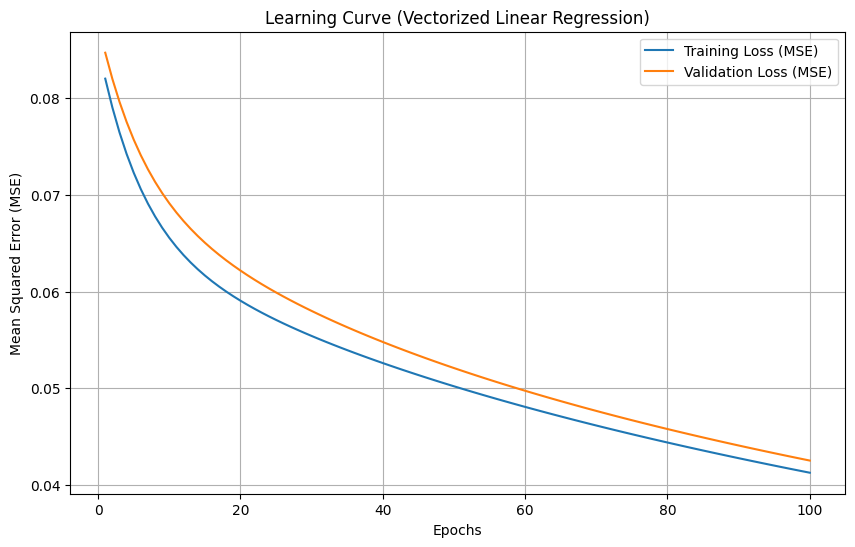

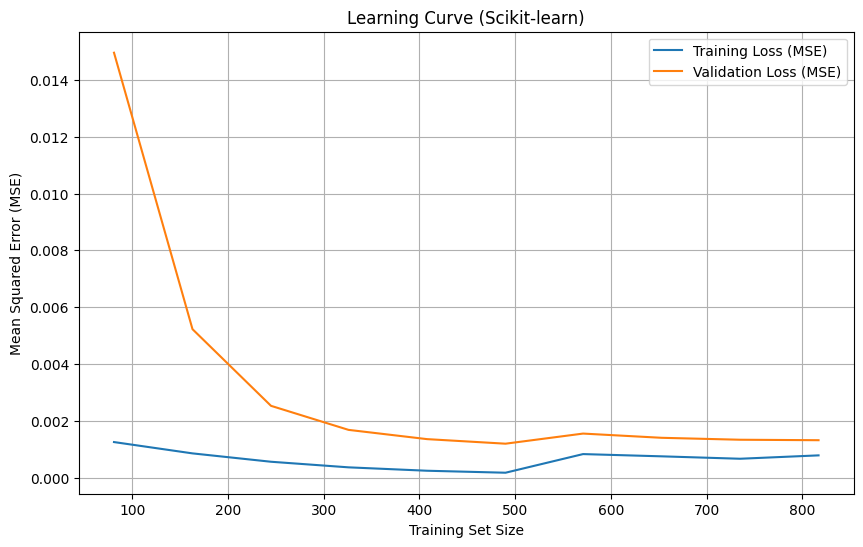

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset (selected features)
df = selected_features_final1

#X = df.iloc[:, :-1]  # Features
#y = df.iloc[:, -1]   # Target

#X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# K-Fold Cross-Validation (Validation set is selected in each fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression (Degree=2)": make_pipeline(PolynomialFeatures(2), LinearRegression()),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso()
}

# Train and evaluate models using K-Fold Cross-Validation
results = {}
for name, model in models.items():
    mae_list, mse_list, rmse_list, r2_list = [], [], [], []

    for train_idx, val_idx in kf.split(X_train_val):
        X_train, X_val = X_train_val.iloc[train_idx], X_train_val.iloc[val_idx]
        y_train, y_val = y_train_val.iloc[train_idx], y_train_val.iloc[val_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        mae_list.append(mean_absolute_error(y_val, y_pred))
        mse_list.append(mean_squared_error(y_val, y_pred))
        rmse_list.append(np.sqrt(mse_list[-1]))
        r2_list.append(r2_score(y_val, y_pred))

    results[name] = (np.mean(mae_list), np.mean(mse_list), np.mean(rmse_list), np.mean(r2_list))

# Display results
print("\nModel Performance on Validation Set (K-Fold CV):")
for name, (mae, mse, rmse, r2) in results.items():
    print(f"{name}:\n  MAE: {mae:.4f}\n  MSE: {mse:.4f}\n  RMSE: {rmse:.4f}\n  R2 Score: {r2:.4f}\n")

# Select best model (highest average R2 score)
best_model_name = max(results, key=lambda x: results[x][3])
best_model = models[best_model_name]
print(f"Best Model Before Tuning: {best_model_name}\n")

# Hyperparameter tuning for the best model
if isinstance(best_model, Ridge) or isinstance(best_model, Lasso):
    param_grid = {"alpha": [0.01, 0.1, 1, 10, 100]}
elif "Polynomial" in best_model_name:
    param_grid = {"polynomialfeatures__degree": [2, 3, 4]}
else:
    param_grid = {}

if param_grid:
    grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train_val, y_train_val)
    tuned_model = grid_search.best_estimator_

    # Training Error
    y_train_pred = tuned_model.predict(X_train_val)
    train_mae = mean_absolute_error(y_train_val, y_train_pred)
    train_mse = mean_squared_error(y_train_val, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train_val, y_train_pred)

    # Test Error
    y_test_pred = tuned_model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)

    print("\nModel Performance After Tuning:")
    print(f"{best_model_name} (Training Set):")
    print(f"  MAE: {train_mae:.4f}\n  MSE: {train_mse:.4f}\n  RMSE: {train_rmse:.4f}\n  R2 Score: {train_r2:.4f}\n")

    print(f"{best_model_name} (Test Set):")
    print(f"  MAE: {test_mae:.4f}\n  MSE: {test_mse:.4f}\n  RMSE: {test_rmse:.4f}\n  R2 Score: {test_r2:.4f}\n")

    print(f"Best Parameters: {grid_search.best_params_}")

# ====================================================
# 1. Vectorized Linear Regression Model with Gradient Descent
# ====================================================

class VectorizedLinearRegression:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        self.train_loss = []
        self.val_loss = []

        for epoch in range(self.epochs):
            # Predictions
            y_pred = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Track training loss
            train_mse = mean_squared_error(y, y_pred)
            self.train_loss.append(train_mse)

            # Track validation loss (if validation set is provided)
            if hasattr(self, 'X_val'):
                y_val_pred = np.dot(self.X_val, self.weights) + self.bias
                val_mse = mean_squared_error(self.y_val, y_val_pred)
                self.val_loss.append(val_mse)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Prepare data for vectorized linear regression
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Train vectorized linear regression
vectorized_model = VectorizedLinearRegression(learning_rate=0.01, epochs=100)
vectorized_model.X_val = X_val  # Pass validation set
vectorized_model.y_val = y_val
vectorized_model.fit(X_train, y_train)

# Plot learning curve for vectorized model
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), vectorized_model.train_loss, label="Training Loss (MSE)")
plt.plot(range(1, 101), vectorized_model.val_loss, label="Validation Loss (MSE)")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Learning Curve (Vectorized Linear Regression)")
plt.legend()
plt.grid()
plt.show()

# ====================================================
# 2. Scikit-learn Learning Curve
# ====================================================

# Use the best model for learning curve
train_sizes, train_scores, val_scores = learning_curve(
    tuned_model, X_train_val, y_train_val, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Convert scores to positive MSE
train_scores_mse = -train_scores.mean(axis=1)
val_scores_mse = -val_scores.mean(axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mse, label="Training Loss (MSE)")
plt.plot(train_sizes, val_scores_mse, label="Validation Loss (MSE)")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Learning Curve (Scikit-learn)")
plt.legend()
plt.grid()
plt.show()